In [1]:
# external packages
from pathlib import Path
import matplotlib.pyplot as plt 
from importlib import reload
import matplotlib
%matplotlib qt
# %matplotlib inline
import numpy as np
matplotlib.style.use('default')
from datetime import datetime
from datetime import timedelta
import pandas as pd
from collections import namedtuple
from collections import deque
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ParameterGrid
import random
import time

In [2]:
# local modules and packages
from ForexMachine.Preprocessing import get_indicators as gi
from ForexMachine import util
reload(gi)
reload(util)

<module 'ForexMachine.util' from 'c:\\github repos\\forexmachine\\ForexMachine\\util.py'>

# load in and add indicators to raw data

In [3]:
# convert config to dictionary
config = util.yaml_to_dict()
current_model = config['current_model']
indicators = config[current_model]['indicators']
print(indicators)
# Read in data with indicators
data_with_indicators = gi.add_indicators_to_raw(filepath='../Data/RawData/EURUSDi1440.csv', save_to_disk=True, 
                                                config=config)
data_with_indicators.head(55)

{'ichimoku': {'tenkan_period': 9, 'kijun_period': 26, 'chikou_period': 26, 'senkou_b_period': 52}, 'rsi': {'periods': 14}}


Date   Time     Open     High      Low    Close  Volume   datetime  \
0   2011.10.14  00:00  1.37765  1.38935  1.37231  1.38772   79276 2011-10-14   
1   2011.10.16  00:00  1.38780  1.38856  1.38602  1.38775    1313 2011-10-16   
2   2011.10.17  00:00  1.38655  1.39139  1.37254  1.37371   82980 2011-10-17   
3   2011.10.18  00:00  1.37371  1.38169  1.36526  1.37513   92915 2011-10-18   
4   2011.10.19  00:00  1.37511  1.38688  1.37249  1.37602   89933 2011-10-19   
5   2011.10.20  00:00  1.37602  1.38427  1.36560  1.37796   94978 2011-10-20   
6   2011.10.21  00:00  1.37798  1.39006  1.37038  1.38910   82195 2011-10-21   
7   2011.10.23  00:00  1.38436  1.38711  1.38401  1.38690     336 2011-10-23   
8   2011.10.24  00:00  1.38441  1.39561  1.38220  1.39282   79819 2011-10-24   
9   2011.10.25  00:00  1.39282  1.39597  1.38521  1.39066   83660 2011-10-25   
10  2011.10.26  00:00  1.39066  1.39750  1.37980  1.39060   83180 2011-10-26   
11  2011.10.27  00:00  1.39057  1.42465  1.38640  1.41875   91731 2011-10-27   
12  2011.10.28  00:00  1.41875  1.42002  1.41334  1.41449   75439 2011-10-28   
13  2011.10.30  00:00  1.41502  1.41616  1.41396  1.41432    1945 2011-10-30   
14  2011.10.31  00:00  1.41505  1.41704  1.38283  1.38599   91951 2011-10-31   
15  2011.11.01  00:00  1.38600  1.38710  1.36076  1.36963  102926 2011-11-01   
16  2011.11.02  00:00  1.36971  1.38276  1.36357  1.37477   92669 2011-11-02   
17  2011.11.03  00:00  1.37477  1.38541  1.36564  1.38132   97623 2011-11-03   
18  2011.11.04  00:00  1.38132  1.38677  1.37108  1.37898   82606 2011-11-04   
19  2011.11.06  00:00  1.38266  1.38308  1.37998  1.38176    1030 2011-11-06   
20  2011.11.07  00:00  1.38268  1.38308  1.36808  1.37746   84065 2011-11-07   
21  2011.11.08  00:00  1.37749  1.38467  1.37243  1.38327   79486 2011-11-08   
22  2011.11.09  00:00  1.38327  1.38584  1.35231  1.35416   91607 2011-11-09   
23  2011.11.10  00:00  1.35422  1.36527  1.34835  1.36057   90295 2011-11-10   
24  2011.11.11  00:00  1.36056  1.37947  1.35780  1.37470   73878 2011-11-11   
25  2011.11.14  00:00  1.38090  1.38090  1.35910  1.36321   77676 2011-11-14   
26  2011.11.15  00:00  1.36322  1.36405  1.34961  1.35390   82173 2011-11-15   
27  2011.11.16  00:00  1.35391  1.35564  1.34285  1.34631   88877 2011-11-16   
28  2011.11.17  00:00  1.34630  1.35399  1.34216  1.34577   90982 2011-11-17   
29  2011.11.18  00:00  1.34578  1.36137  1.34468  1.35238   79095 2011-11-18   
30  2011.11.20  00:00  1.35110  1.35339  1.35110  1.35250     778 2011-11-20   
31  2011.11.21  00:00  1.35137  1.35405  1.34295  1.34891   78864 2011-11-21   
32  2011.11.22  00:00  1.34886  1.35681  1.34690  1.35045   78546 2011-11-22   
33  2011.11.23  00:00  1.35044  1.35310  1.33200  1.33412   82468 2011-11-23   
34  2011.11.24  00:00  1.33413  1.34113  1.33154  1.33458   58267 2011-11-24   
35  2011.11.25  00:00  1.33457  1.33515  1.32121  1.32375   68637 2011-11-25   
36  2011.11.27  00:00  1.33202  1.33222  1.32877  1.33110     400 2011-11-27   
37  2011.11.28  00:00  1.33208  1.33986  1.32728  1.33191   80774 2011-11-28   
38  2011.11.29  00:00  1.33189  1.34416  1.32855  1.33157   80923 2011-11-29   
39  2011.11.30  00:00  1.33161  1.35324  1.32593  1.34456   83227 2011-11-30   
40  2011.12.01  00:00  1.34454  1.35210  1.34169  1.34611   75925 2011-12-01   
41  2011.12.02  00:00  1.34607  1.35473  1.33629  1.33915   66736 2011-12-02   
42  2011.12.04  00:00  1.34228  1.34228  1.33964  1.34071    2324 2011-12-04   
43  2011.12.05  00:00  1.34229  1.34860  1.33747  1.34000   66382 2011-12-05   
44  2011.12.06  00:00  1.34005  1.34277  1.33327  1.34007   74274 2011-12-06   
45  2011.12.07  00:00  1.34006  1.34533  1.33503  1.34116   69496 2011-12-07   
46  2011.12.08  00:00  1.34112  1.34588  1.32888  1.33413   70348 2011-12-08   
47  2011.12.09  00:00  1.33404  1.34336  1.32812  1.33848   71947 2011-12-09   
48  2011.12.11  00:00  1.33808  1.33814  1.33593  1.33604    1998 2011-12-11   
49  2011.1

# define helper plotting functions

In [4]:
def get_index_range(df,datetime1,datetime2):
    i1 = -1
    i2 = -1
    if datetime1 <= datetime2:
        for i in range(len(df)):
            i1 = i
            if df['datetime'][i] == datetime1:
                break
            if df['datetime'][i] > datetime1:
                i1 = i-1 if i-1 >= 0 else 0
                break
        for i in range(i1, len(df)):
            i2 = i
            if df['datetime'][i] == datetime2:
                break
            if df['datetime'][i] > datetime2:
                i2 = i-1 if i-1 >= 0 else 0
                break
    return i1, i2

# date format 'yyyy.mm.dd'
def show_data_from_range(df, date1, date2, main_indicators = [], sub_indicators = [], visualize_crosses=False, crosses=None):
    start, stop = get_index_range(df, pd.Timestamp.fromisoformat(date1), pd.Timestamp.fromisoformat(date2))
    if start < 0 or stop < 0:
        print('invalid dates')
        return
    
    data_range = df.iloc[start:stop+1]
    chart_count = len(sub_indicators) + 1
    
    top_chart_ratio = 1
    sub_chart_ratio = 0
    if chart_count == 2:
        top_chart_ratio = 3
        sub_chart_ratio = 2 / (chart_count-1)
    if chart_count > 2:
        top_chart_ratio = 1
        sub_chart_ratio = 1 / (chart_count-1)
    height_ratios = [top_chart_ratio]
    height_ratios.extend([sub_chart_ratio]*(chart_count-1))
    fig, axes = plt.subplots(chart_count,1,sharex='col', gridspec_kw={'height_ratios':height_ratios})
    fig.tight_layout(pad=1.8, h_pad=0.0)
    
    top_ax = None
    bottom_ax = None
    if chart_count > 1:
        top_ax = axes[0]
        bottom_ax = axes[len(axes)-1]
    else:
        bottom_ax = top_ax = axes
    top_ax.plot(data_range.Close.to_list(), label='Close',color='brown')
    
    plot_indicator_funcs = {
        'ichimoku': lambda ax, dataf: add_ichimoku_to_plot(ax, dataf, visualize_crosses, crosses),
        'rsi': lambda ax, dataf: add_rsi_to_plot(ax, dataf)
    }
    
    for indicator in main_indicators:
        plot_indicator_funcs[indicator](top_ax, data_range)
    
    for i in range(len(sub_indicators)):
        plot_indicator_funcs[sub_indicators[i]](axes[i+1], data_range)

    bottom_ax.set_xticks(np.arange(len(data_range)))
    #     condition = data_range.index % 10 == 0
    #     condition[-1] = True
    #     x_labels = np.where(condition, data_range['Date'], None)
    x_labels = [dt.strftime('%Y-%m-%d %H:%M') * ((i+1)%2) for i,dt in enumerate(data_range['datetime'])]
    
#     top_ax.axvline(stop-start-5,color='red')
    bottom_ax.set_xticklabels(x_labels,rotation=80, wrap=True)
    
    if chart_count > 1:
        for ax in axes:
            ax.legend()
    else:
        top_ax.legend()
        
    plt.show()

In [5]:
"""
Functions for adding indicators to a matplotlib chart
"""

def add_ichimoku_to_plot(ax, df, visualize_crosses = False, crosses=None):
    ax.plot(df.trend_visual_ichimoku_a.to_list(), label='Senkou-Span a',linestyle='--',color='green')
    ax.plot(df.trend_visual_ichimoku_b.to_list(), label='Senkou-Span b',linestyle='--',color='red')
    ax.fill_between(np.arange(len(df)),df.trend_visual_ichimoku_a,
                    df.trend_visual_ichimoku_b,alpha=0.2,color='green',
                    where=(df.trend_visual_ichimoku_a > df.trend_visual_ichimoku_b))
    ax.fill_between(np.arange(len(df)),df.trend_visual_ichimoku_a,
                    df.trend_visual_ichimoku_b,alpha=0.2,color='red',
                    where=(df.trend_visual_ichimoku_a <= df.trend_visual_ichimoku_b))
    ax.plot(df.trend_ichimoku_conv.to_list(), label='Tenkan-Sen (conversion)',color='cyan')
    ax.plot(df.trend_ichimoku_base.to_list(), label='Kijun Sen (base)',color='blue')
    ax.plot(df.chikou_span.to_list(), label='chikou span',linestyle=':',color='orange')
    
    if visualize_crosses:
        colors = {
            'tk_cross': 'red',
            'tk_price_cross': 'green',
            'senkou_cross': 'blue',
            'chikou_cross': 'orange',
            'kumo_breakout': 'purple'
        }
        
        close = df.Close.to_list()            
        tk_cross_bull_strength = df.tk_cross_bull_strength.to_list()
        tk_cross_bear_strength = df.tk_cross_bear_strength.to_list()
        tk_cross_length_bull = df.tk_cross_bull_length.to_list()
        tk_cross_length_bear = df.tk_cross_bear_length.to_list()
        tk_price_cross_bull_strength = df.tk_price_cross_bull_strength.to_list()
        tk_price_cross_bear_strength = df.tk_price_cross_bear_strength.to_list()
        tk_price_cross_length_bull = df.tk_price_cross_bull_length.to_list()
        tk_price_cross_length_bear = df.tk_price_cross_bear_length.to_list()
        senkou_cross_bull_strength = df.senkou_cross_bull_strength.to_list()
        senkou_cross_bear_strength = df.senkou_cross_bear_strength.to_list()
        senkou_cross_length_bull = df.senkou_cross_bull_length.to_list()
        senkou_cross_length_bear = df.senkou_cross_bear_length.to_list()
        chikou_cross_bull_strength = df.chikou_cross_bull_strength.to_list()
        chikou_cross_bear_strength = df.chikou_cross_bear_strength.to_list()
        chikou_cross_length_bull = df.chikou_cross_bull_length.to_list()
        chikou_cross_length_bear = df.chikou_cross_bear_length.to_list()
        cloud_breakout_bull = df.cloud_breakout_bull.to_list()
        cloud_breakout_bear = df.cloud_breakout_bear.to_list()
        
        if not crosses:
            crosses = set(['tk_cross', 'tk_price_cross', 'senkou_cross', 'chikou_cross', 'kumo_breakout'])
        else:
            crosses = set(crosses)
                
        for i in range(len(df)):
            vert_occupied = False
            filler = ''
            
            # tk cross
            if 'tk_cross' in crosses:
                if not np.isnan(tk_cross_bull_strength[i]) and tk_cross_bull_strength[i] > 0:
                    ax.axvline(x = i, color = colors['tk_cross'])
                    ax.text(x = i, y = close[i], color = colors['tk_cross'],
                            s = f'^ TK Cross Bull\nstrength={tk_cross_bull_strength[i]}\nlength={tk_cross_length_bull[i]}')
                    vert_occupied = True

                if not np.isnan(tk_cross_bear_strength[i]) and tk_cross_bear_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['tk_cross'])
                    ax.text(x = i, y = close[i], color = colors['tk_cross'],
                            s = f'_ TK Cross Bear\nstrength={tk_cross_bear_strength[i]}'
                                f'\nlength={tk_cross_length_bear[i]}{filler}')
                    vert_occupied = True
            
            # tk price cross
            if 'tk_price_cross' in crosses:
                if not np.isnan(tk_price_cross_bull_strength[i]) and tk_price_cross_bull_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['tk_price_cross'])
                    ax.text(x = i, y = close[i], color = colors['tk_price_cross'],
                            s = f'^ TK Price Cross Bull\nstrength={tk_price_cross_bull_strength[i]}'
                                f'\nlength={tk_price_cross_length_bull[i]}{filler}')
                    vert_occupied = True

                if not np.isnan(tk_price_cross_bear_strength[i]) and tk_price_cross_bear_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['tk_price_cross'])
                    ax.text(x = i, y = close[i], color = colors['tk_price_cross'],
                            s = f'_ TK Price Cross Bear\nstrength={tk_price_cross_bear_strength[i]}'
                                f'\nlength={tk_price_cross_length_bear[i]}{filler}')
                    vert_occupied = True
            
            # senkou cross
            if 'senkou_cross' in crosses:
                if not np.isnan(senkou_cross_bull_strength[i]) and senkou_cross_bull_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['senkou_cross'])
                    ax.text(x = i, y = close[i], color = colors['senkou_cross'],
                            s = f'^ Senkou Cross Bull\nstrength={senkou_cross_bull_strength[i]}'
                                f'\nlength={senkou_cross_length_bull[i]}{filler}')
                    vert_occupied = True

                if not np.isnan(senkou_cross_bear_strength[i]) and senkou_cross_bear_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['senkou_cross'])
                    ax.text(x = i, y = close[i], color = colors['senkou_cross'],
                            s = f'_ Senkou Cross Bear\nstrength={senkou_cross_bear_strength[i]}'
                                f'\nlength={senkou_cross_length_bear[i]}{filler}')
                    vert_occupied = True
                
            # chikou cross
            if 'chikou_cross' in crosses:
                if not np.isnan(chikou_cross_bull_strength[i]) and chikou_cross_bull_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['chikou_cross'])
                    ax.text(x = i, y = close[i], color = colors['chikou_cross'],
                            s = f'^ Chikou Cross Bull\nstrength={chikou_cross_bull_strength[i]}'
                                f'\nlength={chikou_cross_length_bull[i]}{filler}')
                    vert_occupied = True

                if not np.isnan(chikou_cross_bear_strength[i]) and chikou_cross_bear_strength[i] > 0:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['chikou_cross'])
                    ax.text(x = i, y = close[i], color = colors['chikou_cross'],
                            s = f'_ Chikou Cross Bear\nstrength={chikou_cross_bear_strength[i]}'
                                f'\nlength={chikou_cross_length_bear[i]}{filler}')
                    vert_occupied = True
            
            # kumo breakout
            if 'kumo_breakout' in crosses:
                if cloud_breakout_bull[i]:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['kumo_breakout'])
                    ax.text(x = i, y = close[i], color = colors['kumo_breakout'], s = f'^ Kumo Breakout Bullish')
                    vert_occupied = True

                if cloud_breakout_bear[i]:
                    if vert_occupied:
                        filler += '\n'*3
                    ax.axvline(x = i, color = colors['kumo_breakout'])
                    ax.text(x = i, y = close[i], color = colors['kumo_breakout'], s = f'_ Kumo Breakout Bearish')
                    vert_occupied = True
        

def add_rsi_to_plot(ax, df):
    ax.plot(df.momentum_rsi.to_list(), label='RSI', color='purple')
    ax.plot([30]*len(df),color='gray',alpha=0.5)
    ax.plot([70]*len(df),color='gray',alpha=0.5)
    ax.fill_between(np.arange(len(df)),[30]*len(df),[70]*len(df),color='gray',alpha=0.2)
    ax.set_ylim(15,85)
    ax.set_yticks(np.arange(20,100,20))

# define helper functions and classes for generating features

In [6]:
def add_features(df, inplace=False, negative_bears=True):
    
    ### temporal features
    
    quarters = []
    days_of_week = []
    months = []
    days = []
    minutes = []
    hours = []
    years = []
    
    ### ichimoku features
    
    is_price_above_cb_lines = []
    is_price_above_cloud = []
    is_price_inside_cloud = []
    is_price_below_cloud = []
    cloud_breakout_bull = []
    cloud_breakout_bear = []
    ticks_since_cloud_breakout_bull = []
    ticks_since_cloud_breakout_bear = []
    
    first_kumo_breakout_bull = False
    first_kumo_breakout_bear = False
    
    # names of each cross type
    cross_names = ['tk_cross','tk_price_cross','senkou_cross','chikou_cross']
    # dict to hold similar features of each cross type
    crosses_dict = {} 
    for name in cross_names:
        crosses_dict[name] = {
            'most_recent_bull_strength': [],
            'most_recent_bear_strength': [],
            'bull_strength': [],
            'bear_strength': [],
            'ticks_since_bull': [],
            'ticks_since_bear': [],
            'most_recent_bull_length': [],
            'most_recent_bear_length': [],
            'bull_length': [],
            'bear_length': [],
            'first_bull': False,
            'first_bear': False
        }
    
    data = df.values
    feature_indices = {df.columns[i]:i for i in range(len(df.columns))}
    
    fg = FeatuteGenerator(data,feature_indices,chikou_period = 26)
    for i in range(len(data)):
        # get temporal features signals
        temporal_features = fg.get_temporal_features(i)
        quarters.append(temporal_features.quarter)
        days_of_week.append(temporal_features.day_of_week)
        months.append(temporal_features.month)
        days.append(temporal_features.day)
        minutes.append(temporal_features.minute)
        hours.append(temporal_features.hour)
        years.append(temporal_features.year)
        
        # get ichimoku signals
        ichimoku_features = fg.get_ichimoku_features(i, cross_length_limit=np.Inf)
        is_price_above_cb_lines.append(ichimoku_features['is_price_above_cb_lines'])
        is_price_above_cloud.append(ichimoku_features['is_price_above_cloud'])
        is_price_inside_cloud.append(ichimoku_features['is_price_inside_cloud'])
        is_price_below_cloud.append(ichimoku_features['is_price_below_cloud'])
        
        # handle kumo breakout
        cloud_breakout_bull.append(ichimoku_features['cloud_breakout_bull'])
        cloud_breakout_bear.append(ichimoku_features['cloud_breakout_bear']) 
        
        if ichimoku_features['cloud_breakout_bull']:
            first_kumo_breakout_bull = True
        if ichimoku_features['cloud_breakout_bear']:
            first_kumo_breakout_bear = True
        
        if first_kumo_breakout_bull:
            if ichimoku_features['cloud_breakout_bull']:
                ticks_since_cloud_breakout_bull.append(0)
            else:
                ticks_since_cloud_breakout_bull.append(ticks_since_cloud_breakout_bull[-1] + 1)
        else:
            ticks_since_cloud_breakout_bull.append(None)
        
        if first_kumo_breakout_bear:
            if ichimoku_features['cloud_breakout_bear']:
                ticks_since_cloud_breakout_bear.append(0)
            else:
                ticks_since_cloud_breakout_bear.append(ticks_since_cloud_breakout_bear[-1] + 1)
        else:
            ticks_since_cloud_breakout_bear.append(None)
        
        # handle other ichimoku cloud crosses
        for cross_name in crosses_dict:
            cross_dict = crosses_dict[cross_name]
            
            bull_strength, bear_strength, cross_length = ichimoku_features[cross_name]
            
            if bull_strength > 0:
                cross_dict['first_bull'] = True 
            if bear_strength > 0:
                cross_dict['first_bear'] = True
            
            if cross_dict['first_bull']:
                if bull_strength > 0:
                    cross_dict['most_recent_bull_strength'].append(bull_strength)
                    cross_dict['bull_strength'].append(bull_strength)
                    cross_dict['ticks_since_bull'].append(0)
                    cross_dict['most_recent_bull_length'].append(cross_length)
                    cross_dict['bull_length'].append(cross_length)
                else:
                    cross_dict['most_recent_bull_strength'].append(cross_dict['most_recent_bull_strength'][-1])
                    cross_dict['bull_strength'].append(0)
                    cross_dict['ticks_since_bull'].append(cross_dict['ticks_since_bull'][-1] + 1)
                    cross_dict['most_recent_bull_length'].append(cross_dict['most_recent_bull_length'][-1])
                    cross_dict['bull_length'].append(0)
            else:
                cross_dict['most_recent_bull_strength'].append(None)
                cross_dict['bull_strength'].append(None)
                cross_dict['ticks_since_bull'].append(None)
                cross_dict['most_recent_bull_length'].append(None)
                cross_dict['bull_length'].append(None)
            
            if cross_dict['first_bear']:
                if bear_strength > 0: 
                    if negative_bears:
                        bear_strength *= -1
                    cross_dict['most_recent_bear_strength'].append(bear_strength)
                    cross_dict['bear_strength'].append(bear_strength)
                    cross_dict['ticks_since_bear'].append(0)
                    cross_dict['most_recent_bear_length'].append(cross_length)
                    cross_dict['bear_length'].append(cross_length)
                else:
                    cross_dict['most_recent_bear_strength'].append(cross_dict['most_recent_bear_strength'][-1])
                    cross_dict['bear_strength'].append(0)
                    cross_dict['ticks_since_bear'].append(cross_dict['ticks_since_bear'][-1] + 1)
                    cross_dict['most_recent_bear_length'].append(cross_dict['most_recent_bear_length'][-1])
                    cross_dict['bear_length'].append(0)
            else:
                cross_dict['most_recent_bear_strength'].append(None)
                cross_dict['bear_strength'].append(None)
                cross_dict['ticks_since_bear'].append(None)
                cross_dict['most_recent_bear_length'].append(None)
                cross_dict['bear_length'].append(None)
    
    if not inplace:
        df = df.copy()
    
    df['quarter'] = quarters
    df['day_of_week'] = days_of_week
    df['month'] = months
    df['day'] = days
    df['minute'] = minutes
    df['hour'] = hours
    df['year'] = years
    df['is_price_above_cb_lines'] = is_price_above_cb_lines
    df['is_price_above_cloud'] = is_price_above_cloud
    df['is_price_inside_cloud'] = is_price_inside_cloud
    df['is_price_below_cloud'] = is_price_below_cloud
    df['cloud_breakout_bull'] = cloud_breakout_bull
    df['cloud_breakout_bear'] = cloud_breakout_bear
    df['ticks_since_cloud_breakout_bull'] = ticks_since_cloud_breakout_bull
    df['ticks_since_cloud_breakout_bear'] = ticks_since_cloud_breakout_bear
    
    for cross_name in crosses_dict:
        df[f'{cross_name}_most_recent_bull_strength'] = crosses_dict[cross_name]['most_recent_bull_strength']
        df[f'{cross_name}_most_recent_bear_strength'] = crosses_dict[cross_name]['most_recent_bear_strength']
        df[f'{cross_name}_bull_strength'] = crosses_dict[cross_name]['bull_strength']
        df[f'{cross_name}_bear_strength'] = crosses_dict[cross_name]['bear_strength']
        df[f'{cross_name}_ticks_since_bull'] = crosses_dict[cross_name]['ticks_since_bull']
        df[f'{cross_name}_ticks_since_bear'] = crosses_dict[cross_name]['ticks_since_bear']
        df[f'{cross_name}_most_recent_bull_length'] = crosses_dict[cross_name]['most_recent_bull_length']
        df[f'{cross_name}_most_recent_bear_length'] = crosses_dict[cross_name]['most_recent_bear_length']
        df[f'{cross_name}_bull_length'] = crosses_dict[cross_name]['bull_length']
        df[f'{cross_name}_bear_length'] = crosses_dict[cross_name]['bear_length']
    
    return df

In [7]:
class FeatuteGenerator:
    def __init__(self, data,feature_indices,chikou_period=26):
        self.data = data
        self.feature_indices = feature_indices
        self.rsi_divergence_range = 30
        self.last_rsi_divergence = 0 # 0 - None, 1 - bearish, 2 -  hidden bearish, 3 - bullish, 4 - hidden bullish
        self.rsi_highs = deque()
        self.rsi_lows = deque()
        self.cross_lengths = {}
        self.price_entered_tk_region_from_top = False
        self.price_entered_tk_region_from_bot = False
        self.temporal_features = namedtuple('temporal_features', 'quarter year month day day_of_week hour minute')
        self.chikou_period = chikou_period
        self.safe_start_idx = self._get_safe_ichimoku_idx()
    
    def get_temporal_features(self,i):
        dt = self.data[i][self.feature_indices['datetime']]
        
        features = self.temporal_features(quarter=dt.quarter, year=dt.year, month=dt.month, day=dt.day,
                                          day_of_week=dt.dayofweek, hour=dt.hour, minute=dt.minute)
        return features
    
#     def check_rsi_divergence(self,index):
#         momentum_rsi_i = self.feature_indices['momentum_rsi']
#         if not pd.isna(self.data[index][momentum_rsi_i]):
#             rsi1 = self.data[index][momentum_rsi_i]
#             rsi2 = self.data[index-1][momentum_rsi_i]
#             rsi3 = self.data[index-2][momentum_rsi_i]
#             if rsi1 < rsi2 and rsi3 < rsi2:
#                 self.rsi_highs.appendleft((index-1,rsi2))
#                 for high in self.rsi_highs:
#                     if high[0] == index-1:
#                         continue
                    
#             elif rsi1 > rsi2 and rsi3 > rsi2:
#                 self.rsi_lows.appendleft((index-1,rsi2))

#             if len(self.rsi_highs) > 0:
#                 if self.rsi_highs[0][0] < index - self.rsi_divergence_range:
#                     self.rsi_highs.pop()
#             if len(self.rsi_lows) > 0:
#                 if self.rsi_lows[0][0] < index - self.rsi_divergence_range:
#                     self.rsi_lows.pop()           
    
    def get_ichimoku_features(self, i, cross_length_limit = 1):
        is_price_above_cb_lines = None
        is_price_above_cloud = None
        is_price_inside_cloud = None
        is_price_below_cloud = None
        cloud_top = None
        cloud_bottom = None

        # cross signals represented as tuples: (bullish strength, bearish strength, cross length)
        # - cross signal strength indicated by 0, 1, 2, 3 for none, weak, neutral, strong
        #    or just 0, 1, 3 for none, weak, strong
        # - cross length is just the number of ticks the cross occured over
        tk_cross = (0,0,0)
        tk_price_cross = (0,0,0)
        senkou_cross = (0,0,0)
        chikou_cross = (0,0,0)
        cloud_breakout_bull = False
        cloud_breakout_bear = False
        
        close = self.feature_indices['Close']
        trend_visual_ichimoku_a = self.feature_indices['trend_visual_ichimoku_a']
        trend_visual_ichimoku_b = self.feature_indices['trend_visual_ichimoku_b']
        trend_ichimoku_conv = self.feature_indices['trend_ichimoku_conv']
        trend_ichimoku_base = self.feature_indices['trend_ichimoku_base']
        chikou_span = self.feature_indices['chikou_span']
        
        cloud_top, cloud_bottom = self._get_top_and_bottom_line_idx(trend_visual_ichimoku_a,trend_visual_ichimoku_b,i)

        if not pd.isna(self.data[i][trend_ichimoku_conv]) and not pd.isna(self.data[i][trend_ichimoku_base]):
            if self.data[i][close] > self.data[i][trend_ichimoku_conv] and self.data[i][close] > self.data[i][trend_ichimoku_base]:
                is_price_above_cb_lines = True
            else:
                is_price_above_cb_lines = False

            if self.data[i][close] > self.data[i][cloud_bottom] and self.data[i][close] < self.data[i][cloud_top]:
                is_price_inside_cloud = True
                is_price_above_cloud = False
                is_price_below_cloud = False
            else:
                is_price_inside_cloud = False
                if self.data[i][close] <= self.data[i][cloud_bottom]:
                    is_price_above_cloud = False
                    is_price_below_cloud = True
                else:
                    is_price_above_cloud = True
                    is_price_below_cloud = False
        
        ### check for crosses
        
        if i >= self.safe_start_idx:
            
            ### tk cross
            
            cross, length, top_line_i, bottom_line_i = \
                self._get_cross_and_length('tk_cross', trend_ichimoku_conv,trend_ichimoku_base,i)
            
            # price cross clean through both tk region (cross == 2), or price cross through both 
            # tk region over limited amout of ticks (cross == 3 and length <= cross_length_limit)
            if cross == 2 \
                    or (cross == 3 and length <= cross_length_limit):
                
                # bullish
                if top_line_i == trend_ichimoku_conv:
                    if self._is_line_between_others(top_line_i,cloud_top,cloud_bottom,i) \
                            and self._is_line_between_others(bottom_line_i,cloud_top,cloud_bottom,i):
                        tk_cross = (2,0,length)
                    elif self.data[i][bottom_line_i] >= self.data[i][cloud_top]:
                        tk_cross = (3,0,length)
                    else:
                        tk_cross = (1,0,length)
                # bearish
                elif top_line_i == trend_ichimoku_base:
                    if self._is_line_between_others(top_line_i,cloud_top,cloud_bottom,i) \
                            and self._is_line_between_others(bottom_line_i,cloud_top,cloud_bottom,i):
                        tk_cross = (0,2,length)
                    elif self.data[i][top_line_i] <= self.data[i][cloud_bottom]:
                        tk_cross = (0,3,length)
                    else:
                        tk_cross = (0,1,length)
                else:
                    print('weird 5:', self.data[i][self.feature_indices['datetime']])
                
            ### tk price cross
            
            cross_res = self._get_cross_and_length_regions('tk_price_cross', trend_ichimoku_conv, trend_ichimoku_base,
                                                            close, close, i)
            cross, length, first_line, second_line, third_line, fourth_line = cross_res
            
            if cross == 2 or (cross == 3 and length <= cross_length_limit):
                
                # "It’s a noise zone when price is in the Cloud"
                #  https://www.tradeciety.com/the-complete-ichimoku-trading-guide-how-to-use-the-ichimoku-indicator/
                
                # bullish 
                if first_line == close:
                    if self.data[i][close] >= self.data[i][cloud_top]:
                        tk_price_cross = (3,0,length)
                    elif self.data[i][close] <= self.data[i][cloud_bottom]:
                        tk_price_cross = (1,0,length)
                # bearish
                elif fourth_line == close:
                    if self.data[i][close] >= self.data[i][cloud_top]:
                        tk_price_cross = (0,1,length)
                    elif self.data[i][close] <= self.data[i][cloud_bottom]:
                        tk_price_cross = (0,3,length)
            elif cross == 3 and length>cross_length_limit:
                print(f'cross type = {cross}, cross length = {length}, {self.data[i][self.feature_indices["datetime"]]}')
            
            ### cloud (senkou) cross
            
            # As the Senkou Spans are projected forward, the cross that triggers this signal will be 26 days ahead of the 
            # price and, hence, the actual date that the signal occurs.  The strength of the signal is determined by the 
            # relationship of the price on the date of the signal (not the trigger) to the Kumo (Cloud)
            # - https://www.ichimokutrader.com/signals.html
            
            cross, length, top_line_i, bottom_line_i = \
                self._get_cross_and_length('cloud_cross', trend_visual_ichimoku_a, trend_visual_ichimoku_b,i)
            
            if cross == 2 \
                    or (cross == 3 and length <= cross_length_limit):
                
                # note you are checking close at index of 26 before current, read comment above
                chikou_period = self.chikou_period
                
                old_cloud_top, old_cloud_bottom = self._get_top_and_bottom_line_idx(trend_visual_ichimoku_a,
                                                                                    trend_visual_ichimoku_b,
                                                                                    i-chikou_period)
                
                # bullish
                if top_line_i == trend_visual_ichimoku_a:
                    if self._is_line_between_others(close,old_cloud_top,old_cloud_bottom,i-chikou_period):
                        senkou_cross = (2,0,length)
                    elif self.data[i-chikou_period][close] >= self.data[i-chikou_period][old_cloud_top]:
                        senkou_cross = (3,0,length)
                    else:
                        senkou_cross = (1,0,length)
                # bearish
                elif top_line_i == trend_visual_ichimoku_b:
                    if self._is_line_between_others(close,old_cloud_top,old_cloud_bottom,i-chikou_period):
                        senkou_cross = (0,2,length)
                    elif self.data[i-chikou_period][close] <= self.data[i-chikou_period][old_cloud_bottom]:
                        senkou_cross = (0,3,length)
                    else:
                        senkou_cross = (0,1,length)
                else:
                    print('weird 5:', self.data[i][self.feature_indices['datetime']])
                
            ### chikou span cross

            # Note (1) that the Chikou Span must be rising when it crosses to above the price for a bull signal 
            # and falling when it crosses to below for a bear signal; just crossing the price alone is not 
            # sufficient to trigger the signal. (2) As the Chikou Span is the closing price shifted into the past, 
            # the cross that triggers this signal will be 26 days behind the price and, hence, the actual date 
            # that the signal occurs.The strength of the signal is determined by the relationship of the price 
            # on the date of the signal (not the trigger) to the Kumo (Cloud).
            # - https://www.ichimokutrader.com/signals.html
            
            # note you are checking for cross at index of 26 before current because that is where the chikou
            # is, read comment above
            cross, length, top_line_i, bottom_line_i = \
                self._get_cross_and_length('chikou_cross', chikou_span, close, i-self.chikou_period)
            
            if cross == 2 \
                    or (cross == 3 and length <= cross_length_limit):
                # bullish
                if top_line_i == chikou_span:
                    if self._is_line_between_others(close, cloud_top, cloud_bottom, i):
                        chikou_cross = (2,0,length)
                    elif self.data[i][close] > self.data[i][cloud_top]:
                        chikou_cross = (3,0,length)
                    else:
                        chikou_cross = (1,0,length)
                # bearish
                elif top_line_i == close:
                    if self._is_line_between_others(close, cloud_top, cloud_bottom, i):
                        chikou_cross = (0,2,length)
                    elif self.data[i][close] < self.data[i][cloud_bottom]:
                        chikou_cross = (0,3,length)
                    else:
                        chikou_cross = (0,1,length)
                else:
                    print('weird 6:', self.data[i][self.feature_indices['datetime']])
            
            ### kumo (cloud) breakout
            
            cross_res = self._get_cross_and_length_regions('kumo_breakout', cloud_top, cloud_bottom,
                                                            close, close, i)
            cross, length, first_line, second_line, third_line, fourth_line = cross_res
            
            # The Kumo Breakout signal occurs when the price leaves or crosses the Kumo (Cloud), which is why
            # we also want to check for if cross == 4 (end of overlap but not a cross)
            # - https://www.ichimokutrader.com/signals.html
            if cross == 2 or cross == 3 or cross == 4:
                # bullish 
                if first_line == close:
                    cloud_breakout_bull = True
                # bearish
                elif fourth_line == close:
                    cloud_breakout_bear = True
        
        features = {
            'is_price_above_cb_lines': is_price_above_cb_lines,
            'is_price_above_cloud': is_price_above_cloud,      
            'is_price_inside_cloud': is_price_inside_cloud,   
            'is_price_below_cloud': is_price_below_cloud,   
            'cloud_top': cloud_top,   
            'cloud_bottom': cloud_bottom,   
            'tk_cross': tk_cross,   
            'tk_price_cross': tk_price_cross,   
            'senkou_cross': senkou_cross,   
            'chikou_cross': chikou_cross,   
            'cloud_breakout_bull': cloud_breakout_bull,
            'cloud_breakout_bear': cloud_breakout_bear
        }
        
        return features
    
    def _get_safe_ichimoku_idx(self):
        exluded_features = {'chikou_span'}
        safe_idx = None
        
        for i in range(len(self.data)):
            nan_in_row = False
            
            for feature in self.feature_indices:
                if feature in exluded_features:
                    continue
                    
                feature_i = self.feature_indices[feature]
                if isinstance(self.data[i][feature_i], float) and np.isnan(self.data[i][feature_i]):
                    safe_idx = None
                    nan_in_row = True
                    break
            
            if not nan_in_row and not safe_idx:
                safe_idx = i
        
        # need to add offset period of chikou and senkou spans to safely determine senkou (cloud) cross strength
        return safe_idx + self.chikou_period
    
    def _get_top_and_bottom_line_idx(self,line1_i,line2_i,i):
        """
        line1_i is top if line values are equal
        """
        top_line_i = line1_i
        bottom_line_i = line2_i
        if self.data[i][line1_i] < self.data[i][line2_i]:
            top_line_i = line2_i
            bottom_line_i = line1_i
        return top_line_i, bottom_line_i
    
    def _is_line_between_others(self,target_line_i,top_line_i,bottom_line_i,i):
        if self.data[i][target_line_i] > self.data[i][bottom_line_i] \
            and self.data[i][target_line_i] < self.data[i][top_line_i]:
            return True
        return False
    
    def _get_cross_and_length_regions(self, cross_name, r1_line1, r1_line2, r2_line1, r2_line2, i):
        """
        cross type can be: no cross '=' (0), start of overlap '>' (1), full cross 'X' (2), end of cross '<' (3),
            or end of overlap w/ no cross (4)
        """
        
        old_r1_top, old_r1_bot = self._get_top_and_bottom_line_idx(r1_line1,r1_line2,i-1)
        old_r2_top, old_r2_bot = self._get_top_and_bottom_line_idx(r2_line1,r2_line2,i-1)
        
        r1_top, r1_bot = self._get_top_and_bottom_line_idx(r1_line1,r1_line2,i)
        r2_top, r2_bot = self._get_top_and_bottom_line_idx(r2_line1,r2_line2,i)
        
        # defines lines from top to bottom between both regions
        sorted_regions_lines = sorted([(line, self.data[i][line]) for line in [r1_top,r1_bot,r2_top,r2_bot]],
                                     key = lambda line_tuple: line_tuple[1], reverse=True)
        first_line, second_line, third_line, fourth_line = sorted_regions_lines
        
        ### check for no cross
        
        old_top_region_bot = None
    
        # region 1 is fully above region 2
        if self.data[i-1][old_r1_bot] > self.data[i-1][old_r2_top]:
            old_top_region_bot = old_r1_bot
            if self.data[i][r1_bot] > self.data[i][r2_top]:
                return 0, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]
        # region 2 is fully above region 1
        elif self.data[i-1][old_r2_bot] > self.data[i-1][old_r1_top]:
            old_top_region_bot = old_r2_bot
            if self.data[i][r2_bot] > self.data[i][r1_top]:
                return 0, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]
        
        ### check for full cross
        
        # region 1 crossed to below region 2
        if self.data[i-1][old_r1_bot] > self.data[i-1][old_r2_top] \
                and self.data[i][r1_top] < self.data[i][r2_bot]:
            return 2, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]
        
        # region 2 crossed to below region 1
        elif self.data[i-1][old_r2_bot] > self.data[i-1][old_r1_top] \
                and self.data[i][r2_top] < self.data[i][r1_bot]:
            return 2, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]
        
        ### check for start of overlap
        
        top_region_top = top_region_bot = bot_region_top = bot_region_bot = None
        # region 1 is highest
        if self.data[i][r1_top] > self.data[i][r2_top]:
            top_region_top = r1_top
            top_region_bot = r1_bot
            bot_region_top = r2_top
            bot_region_bot = r2_bot
        # region 2 is highest
        else:
            top_region_top = r2_top
            top_region_bot = r2_bot
            bot_region_top = r1_top
            bot_region_bot = r1_bot

        # checking for start of overlap
        if cross_name not in self.cross_lengths:  
            # if the bottom line of the top region is still not defined then just consider no cross 
            if not old_top_region_bot:
                return 0, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]  
            else:
                # one region is beginning to intertwine or completely swallow the other, regardless this counts
                # as the start of an overlap
                if self.data[i][bot_region_top] <= self.data[i][top_region_top] \
                        and self.data[i][bot_region_top] >= self.data[i][top_region_bot]:
                    self.cross_lengths[cross_name] = (0, old_top_region_bot)
                    return 1, 0, first_line[0], second_line[0], third_line[0], fourth_line[0]
                print('weird 11:', self.data[i][self.feature_indices['datetime']])
        else:
            # check for continuation of overlap
            if self.data[i][bot_region_top] <= self.data[i][top_region_top] \
                    and self.data[i][bot_region_top] >= self.data[i][top_region_bot]:
                self.cross_lengths[cross_name] = (self.cross_lengths[cross_name][0] + 1, self.cross_lengths[cross_name][1])
                return 0, self.cross_lengths[cross_name][0], first_line[0], second_line[0], third_line[0], fourth_line[0]
            # otherwise, 1 region must be completely above the other
            else:
                original_top_region_bot = self.cross_lengths[cross_name][1]
                res = None
                
                # check for end of cross
                if original_top_region_bot != top_region_bot and original_top_region_bot != top_region_top:
                    res = 3
                # otherwise, end of overlap w/ no cross
                else:
                    res = 4
                
                cross_length = self.cross_lengths[cross_name][0]
                del self.cross_lengths[cross_name]
                return res, cross_length, first_line[0], second_line[0], third_line[0], fourth_line[0]

            
    def _get_cross_and_length(self, cross_name, line_index1, line_index2, index):
        """
        cross type can be: no cross '=' (0), start of overlap '>' (1), full cross 'X' (2), end of cross '<' (3),
            or end of overlap w/ no cross (4)
        """
        
        # remember that if lines are of equal values the first line argument to _get_top_and_bottom_line_idx()
        # will be returned as the top line
        old_top_line_i, old_bottom_line_i = self._get_top_and_bottom_line_idx(line_index1,line_index2,index - 1)
        top_line_i, bottom_line_i = self._get_top_and_bottom_line_idx(line_index1,line_index2,index)
        
        ## check for no cross
        
        if self.data[index][line_index1] != self.data[index][line_index2] \
                and self.data[index-1][line_index1] != self.data[index-1][line_index2] \
                and old_top_line_i == top_line_i \
                and bottom_line_i == old_bottom_line_i:
            return 0, 0, top_line_i, bottom_line_i

        ## check for full cross
        
        if old_top_line_i != top_line_i \
                and self.data[index-1][old_top_line_i] > self.data[index-1][old_bottom_line_i] \
                and self.data[index][old_top_line_i] < self.data[index][old_bottom_line_i]:
            return 2, 0, top_line_i, bottom_line_i
        
        ##check for start of overlap
        
        if cross_name not in self.cross_lengths:
            if self.data[index][line_index1] == self.data[index][line_index2]:
                self.cross_lengths[cross_name] = (0, old_top_line_i,self.data[index][self.feature_indices['datetime']])
                return 1, 0, top_line_i, bottom_line_i
            print('weird 1:', self.data[index][self.feature_indices['datetime']])
        else:
            
            ## check for continuation of overlap
            
            if self.data[index][line_index1] == self.data[index][line_index2]:
                self.cross_lengths[cross_name] = (self.cross_lengths[cross_name][0] + 1, self.cross_lengths[cross_name][1]
                                                  ,self.cross_lengths[cross_name][2])
                return 0, self.cross_lengths[cross_name][0], top_line_i, bottom_line_i
            else:
                cross_old_top_line_i = self.cross_lengths[cross_name][1]
                res = None

                ## check for end of cross
                
                if cross_old_top_line_i != top_line_i:
                    res = 3
                # otherwise, end of overlap w/ no cross
                else:
                    res = 4 

                cross_length = self.cross_lengths[cross_name][0]
                del self.cross_lengths[cross_name]
                return res,cross_length, top_line_i, bottom_line_i

# load data from mt5 terminal

In [57]:
tick_data_filepath = gi.download_mt5_data("EURUSD", 'H1', '2012-01-02', '2020-06-06')

loaded 52227 rows of tick data from C:\GitHub Repos\ForexMachine\Data\.cache\mt5_EURUSD_h1_ticks_2012-01-02T00;00UTC_to_2020-06-06T00;00UTC.csv
saved 52227 rows of EURUSD h1 tick data to C:\GitHub Repos\ForexMachine\Data\RawData\mt5_EURUSD_h1_ticks_2012-01-02T00;00UTC_to_2020-06-06T00;00UTC.csv, done.


In [58]:
data_with_indicators_2 = gi.add_indicators_to_raw(filepath=tick_data_filepath, 
                                                  save_to_disk=True, 
                                                  config=config, 
                                                  has_headers=True,
                                                  datetime_col='datetime')

data_with_ichi_2 = add_features(data_with_indicators_2)
data_with_ichi_2.tail(10)

datetime     Open     High      Low    Close  Volume  spread  \
52217 2020-06-05 14:00:00  1.13285  1.13379  1.13263  1.13355    3291       0   
52218 2020-06-05 15:00:00  1.13355  1.13433  1.12822  1.12950    8341       0   
52219 2020-06-05 16:00:00  1.12950  1.13238  1.12850  1.12969    8023       0   
52220 2020-06-05 17:00:00  1.12967  1.13227  1.12827  1.13118    7192       0   
52221 2020-06-05 18:00:00  1.13118  1.13192  1.12922  1.12955    5279       0   
52222 2020-06-05 19:00:00  1.12955  1.12982  1.12851  1.12904    3437       0   
52223 2020-06-05 20:00:00  1.12906  1.12917  1.12793  1.12913    2271       0   
52224 2020-06-05 21:00:00  1.12913  1.12994  1.12889  1.12936    2902       0   
52225 2020-06-05 22:00:00  1.12936  1.12994  1.12903  1.12914    2176       0   
52226 2020-06-05 23:00:00  1.12915  1.12917  1.12782  1.12874    1255       0   

       trend_ichimoku_conv  trend_ichimoku_base  trend_ichimoku_a  ...  \
52217             1.135035             1.128940          1.131988  ...   
52218             1.133295             1.128940          1.131117  ...   
52219             1.133295             1.130010          1.131652  ...   
52220             1.133295             1.130500          1.131898  ...   
52221             1.133160             1.132500          1.132830  ...   
52222             1.131900             1.133295          1.132597  ...   
52223             1.131130             1.133150          1.132140  ...   
52224             1.131130             1.133150          1.132140  ...   
52225             1.131130             1.133150          1.132140  ...   
52226             1.131075             1.133095          1.132085  ...   

       chikou_cross_most_recent_bull_strength  \
52217                                     3.0   
52218                                     3.0   
52219                                     3.0   
52220                                     3.0   
52221                                     3.0   
52222                                     3.0   
52223                                     3.0   
52224                                     3.0   
52225                                     3.0   
52226                                     3.0   

       chikou_cross_most_recent_bear_strength  chikou_cross_bull_strength  \
52217                                    -1.0                         0.0   
52218                                    -1.0                         0.0   
52219                                    -1.0                         0.0   
52220                                    -1.0                         0.0   
52221                                    -1.0                         0.0   
52222                                    -1.0                         0.0   
52223                                    -1.0                         0.0   
52224                                    -1.0                         0.0   
52225                                    -1.0                         0.0   
52226                                    -1.0                         0.0   

       chikou_cross_bear_strength  chikou_cross_ticks_since_bull  \
52217                         0.0                           24.0   
52218                         0.0                           25.0   
52219                         0.0                           26.0   
52220                         0.0                           27.0   
52221                         0.0                           28.0   
52222                        -1.0                           29.0   
52223                         0.0                           30.0   
52224                         0.0                           31.0   
52225                         0.0                           32.0   
52226                         0.0                           33.0   

       chikou_cross_ticks_since_bear  chikou_cross_most_recent_bull_length  \
52217                           28.0                                   0.0   
52218            

In [22]:
filepath = gi.save_data_with_indicators(data_with_ichi_2,filename=f'ichimoku_sigs-{tick_data_filepath.stem}')
str(filepath)

'C:\\GitHub Repos\\ForexMachine\\Data\\DataWithIndicators\\ichimoku_sigs-mt5_EURUSD_h1_ticks_2012-01-02T00;00UTC_to_2020-06-06T00;00UTC.csv'

# backtest tutorial

### high level process of using backtrader:

```python
class MyStrategy(bt.Strategy):
    def next(self):
        pass

# Instantiate Cerebro engine
cerebro = bt.Cerebro()

# add strategy to cerebro
cerebro.addstrategy(MyStrategy)

# run cerebro engine
cerebro.run()
```

In [211]:
import backtrader as bt

In [328]:
class PrintClose(bt.Strategy):
    def __init__(self):
        # keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
    
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()}, {txt}')
    
    def next(self):
        # Simply log the closing price of the series from the reference
        self.log(f'Close: {self.dataclose[0]}')

class MAcrossover(bt.Strategy):
    # Moving average parameters
    params = (('pfast', 20), ('pslow', 50))
    
    def __init__(self):
        self.dataclose = self.datas[0].close
        
        # Order variable will contain ongoing order details/status
        self.order = None
        
        # Instantiate moving averages
        self.slow_sma = bt.indicators.MovingAverageSimple(self.datas[0], 
                        period=self.params.pslow)
        self.fast_sma = bt.indicators.MovingAverageSimple(self.datas[0], 
                        period=self.params.pfast)
    
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}') # Comment this line when running optimization
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # An activate buy/sell order has been submitted/accepted - Nothing to do
            return
        
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, size: {order.executed.size}, price: {order.executed.price}, cost: {order.executed.value}, commision: {order.executed.comm}')
                print(f'current balance: {self.broker.getvalue()}')
            elif order.issell():
                self.log(f'SELL EXECUTED, size: {order.executed.size}, price: {order.executed.price}, cost: {order.executed.value}, commision: {order.executed.comm}')
                print(f'current balance: {self.broker.getvalue()}')
            self.bar_executed = len(self)
        
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
        
        # Reset orders
        self.order = None
    
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        print()
        self.log(f'OPERATION PROFIT, GROSS: {trade.pnl}, NET: {trade.pnlcomm}')
        print(f'open dt: {trade.open_datetime()} close dt: {trade.close_datetime()}')
        print(f'close price: {trade.price}')
        print(f'bar opened: {trade.baropen}, bar closed: {trade.barclose}')
        print(f'number of bars trade was open for: {trade.barlen}')
        print(f'current balance: {self.broker.getvalue()}')
        print()
    
    def next(self):
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
#             print(f'order value: {order.value}')
#             print(f'order pprice: {order.pprice}')
#             print(f'order psize: {order.psize}')
#             print(f'order pnl: {order.pnl}')
            return
        
        # Check if we are in the market
        if not self.position:
            # We are not in the market, look for a signal to OPEN trades
            
            #If the 20 SMA is above the 50 SMA
            if self.fast_sma[0] > self.slow_sma[0] and self.fast_sma[-1] < self.slow_sma[-1]:
                self.log(f'BUY CREATE {self.dataclose[0]}')
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()
            #Otherwise if the 20 SMA is below the 50 SMA
            elif self.fast_sma[0] < self.slow_sma[0] and self.fast_sma[-1] > self.slow_sma[-1]:
                self.log(f'SELL CREATE {self.dataclose[0]}')
                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()
        else:
            # We are already in the market, look for a signal to CLOSE trades
            if len(self) >= (self.bar_executed + 5):
                self.log(f'CLOSE CREATE {self.dataclose[0]}')
                self.order = self.close()

In [329]:
# Instantiate Cerebro engine
cerebro = bt.Cerebro()

total_time_delta = data_with_ichi_2.iloc[-1,0] - data_with_ichi_2.iloc[0,0]
from1, to1 = data_with_ichi_2.iloc[0,0], data_with_ichi_2.iloc[0,0] + total_time_delta / 2
from2, to2 = data_with_ichi_2.iloc[0,0] + total_time_delta / 2, data_with_ichi_2.iloc[-1,0]

forex_data1 = bt.feeds.GenericCSVData(
    dataname=str(filepath),
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=-1,
    openinterest=-1,
    fromdate=from1.to_pydatetime(),
    todate=to1.to_pydatetime(),
    timeframe=bt.TimeFrame.Minutes
)

forex_data2 = bt.feeds.GenericCSVData(
    dataname=str(filepath),
    datetime=0,
    open=1,
    high=2,
    low=3,
    close=4,
    volume=-1,
    openinterest=-1,
    fromdate=from2.to_pydatetime(),
    todate=to2.to_pydatetime(),
    timeframe=bt.TimeFrame.Minutes
)

# add data to cerebro to read over
cerebro.adddata(forex_data1)

# add strategy to cerebro
cerebro.addstrategy(MAcrossover)

# Default position size
cerebro.addsizer(bt.sizers.SizerFix, stake=5000)

In [330]:
start_balance = cerebro.broker.getvalue()

cerebro.run()

end_balance = cerebro.broker.getvalue()

pnl = end_balance - start_balance
print(f'Starting Portfolio Value: {start_balance}')
print(f'Final Portfolio Value: {end_balance}')
print(f'PnL: {pnl}')

2012-04-05 SELL CREATE 1.30635
2012-04-06 SELL EXECUTED, size: -5000, price: 1.30634, cost: -6531.700000000001, commision: 0.0
current balance: 9986.150000000001
2012-04-13 CLOSE CREATE 1.30764
2012-04-16 BUY EXECUTED, size: 5000, price: 1.3069, cost: -6531.700000000001, commision: 0.0
current balance: 9997.2

2012-04-16 OPERATION PROFIT, GROSS: -2.7999999999994696, NET: -2.7999999999994696
open dt: 2012-04-06 00:00:00 close dt: 2012-04-16 00:00:00
close price: 1.30634
bar opened: 70, bar closed: 76
number of bars trade was open for: 6
current balance: 9997.2

2012-08-28 BUY CREATE 1.25635
2012-08-29 BUY EXECUTED, size: 5000, price: 1.25633, cost: 6281.65, commision: 0.0
current balance: 9980.800000000001
2012-09-05 CLOSE CREATE 1.26021
2012-09-06 SELL EXECUTED, size: -5000, price: 1.2602, cost: 6281.65, commision: 0.0
current balance: 10016.550000000001

2012-09-06 OPERATION PROFIT, GROSS: 19.3500000000002, NET: 19.3500000000002
open dt: 2012-08-29 00:00:00 close dt: 2012-09-06 00:00:

### Generating Labels

In [8]:
def generate_ichimoku_labels(df, min_profit_percent=0.001, units_per_trade=100000, profit_noise_percent=0.0006, label_non_signals=False, print_debug=True,
                             signals_to_consider=None):
    min_profit = min_profit_percent * units_per_trade
    profit_noise = profit_noise_percent * units_per_trade
    data = df.values
    feature_indices = {df.columns[i]:i for i in range(len(df.columns))}
    close_trade_features = []
    close_trade_labels = []
    
    # if any of these columns are equal to 0 then the corresponding signal has occured at that tick
    if not signals_to_consider:
        signals_to_consider = ['ticks_since_cloud_breakout_bull','ticks_since_cloud_breakout_bear',   # cloud breakout
                               'tk_cross_ticks_since_bull', 'tk_cross_ticks_since_bear',              # Tenkan Sen / Kijun Sen Cross
                               'tk_price_cross_ticks_since_bull', 'tk_price_cross_ticks_since_bear',  # price crossing both the Tenkan Sen / Kijun Sen
                               'senkou_cross_ticks_since_bull', 'senkou_cross_ticks_since_bear',      # Senkou Span Cross
                               'chikou_cross_ticks_since_bull', 'chikou_cross_ticks_since_bear']      # Chikou Span Cross
    
    # first find index at which data becomes consistant (no missing data)
    start_idx = None
    exluded_features = {'chikou_span'}
    for i, row in enumerate(data):
        nan_in_row = False
            
        for feature in feature_indices:
            if feature in exluded_features:
                continue
                
            feature_i = feature_indices[feature]
            if pd.isnull(row[feature_i]):
                start_idx = None
                nan_in_row = True
                break

        if not nan_in_row and not start_idx:
            start_idx = i
    
    def get_decision_label(trade, first):
        decision = 'first' if first else 'second'
        label = None
        if trade[f'{decision}_decision_best_buy_profit'][0] > trade[f'{decision}_decision_best_sell_profit'][0]:
            # add 1 to ticks_till_peak to reserve 0 ticks for 'wait' labels
            ticks_till_peak = trade[f'{decision}_decision_best_buy_profit'][1] - trade['trade_open_tick_i'] + 1
            label = ['buy', ticks_till_peak, trade[f'{decision}_decision_best_buy_profit'][0]]
        elif trade[f'{decision}_decision_best_buy_profit'][0] < trade[f'{decision}_decision_best_sell_profit'][0]:
            ticks_till_peak = trade[f'{decision}_decision_best_sell_profit'][1] - trade['trade_open_tick_i'] + 1
            label = ['sell', ticks_till_peak, trade[f'{decision}_decision_best_sell_profit'][0]]

        if label and label[2] < min_profit:
            label = ['wait', 0, 0]

        if trade[f'{decision}_decision_best_buy_profit'][0] == trade[f'{decision}_decision_best_sell_profit'][0]:
            if print_debug:
                print(f'{decision} decision best buy and sell profit equal, trade: {trade}\n')
            label = ['wait', 0, 0]
        return label
    
    # now simulate hedged trades to determine labels
    labels_dict = {}   # 6 labels per label: (1) decision (buy, sell, wait) (str), (2) ticks till best profit (int), and (3) the profit (float) x2 for each decision
    trades = {}
    pending_order = None
    pending_close = None
    for i, row in enumerate(data[start_idx:]):
        i += start_idx
        
        if pending_order is not None:
            pending_order_i, causes = pending_order
            signal_price = data[pending_order_i][feature_indices['Close']]
            open_price = data[i][feature_indices['Open']]
            trades[pending_order_i] = {
                'signal_price': signal_price,
                'signal_datetime': data[pending_order_i][feature_indices['datetime']],
                'open_price': open_price,
                'trade_open_tick_i': i,
                'causes': causes,
                'consider_profit': False,
                'first_decision_best_buy_profit': None, # should be tuple of size 2 where 1st elem is the profit and 2nd is the number of bars to get to that profit
                'first_decision_best_sell_profit': None,
                'second_decision_best_buy_profit': None,
                'second_decision_best_sell_profit': None,
                'first_decision_done': False,
                'second_decision_done': False,
                'first_decision_done_tick_dt': None,
                'second_decision_done_tick_dt': None
            }
            pending_order = None
        
        closed_trades = []
        for trade_i in trades:
            trade = trades[trade_i]
            trade_open_price = trade['open_price']
            close_price = row[feature_indices['Close']]
            last_close_price = data[i-1][feature_indices['Close']] if i-1 != trade_i else trade_open_price
            buy_profit = (close_price - trade_open_price) * units_per_trade
            sell_profit = buy_profit * -1
            
            if abs(buy_profit) >= profit_noise:
                trade['consider_profit'] = True
                        
            if not trade['first_decision_done']:
                if not trade['first_decision_best_buy_profit'] or trade['first_decision_best_buy_profit'][0] < buy_profit:
                    trade['first_decision_best_buy_profit'] = (buy_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                
                if not trade['first_decision_best_sell_profit'] or trade['first_decision_best_sell_profit'][0] < sell_profit:
                    trade['first_decision_best_sell_profit'] = (sell_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                
                # test for end of 1st decision: see if current close price crossed the intial price at which the trade was opened at
                # note: only look for crosses after profit has exceeded profit_noise (small amounts of profit w/ respect to units_per_trade)
                if trade['consider_profit'] and \
                        ((last_close_price < trade_open_price and close_price >= trade_open_price) \
                        or (last_close_price > trade_open_price and close_price <= trade_open_price)): 
                    label = get_decision_label(trade, first=True)
                    trade['first_decision_done'] = True
                    trade['first_decision_done_tick_dt'] = data[i][feature_indices['datetime']]
                    labels_dict[trade_i] = {'first_decision': label}
                    
                    trade['consider_profit'] = False
                    
                    # at this point trade['second_decision_best_buy_profit'] should be None
                    trade['second_decision_best_buy_profit'] = (buy_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                    trade['second_decision_best_sell_profit'] = (sell_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                       
            elif not trade['second_decision_done']:
                if trade['second_decision_best_buy_profit'][0] < buy_profit:
                    trade['second_decision_best_buy_profit'] = (buy_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                
                if trade['second_decision_best_sell_profit'][0] < sell_profit:
                    trade['second_decision_best_sell_profit'] = (sell_profit, i, f'debug notes: ({close_price} - {trade_open_price})*{units_per_trade}')
                
                # test for end of 2nd decision: see if current close price crossed the intial price at which the trade was opened at again
                # note: only look for crosses after profit has exceeded profit_noise (small amounts of profit w/ respect to units_per_trade)
                if trade['consider_profit'] and \
                        ((last_close_price < trade_open_price and close_price >= trade_open_price) \
                        or (last_close_price > trade_open_price and close_price <= trade_open_price)): 
                    label = get_decision_label(trade, first=False)
                    trade['second_decision_done'] = True
                    trade['second_decision_done_tick_dt'] = data[i][feature_indices['datetime']]
                    labels_dict[trade_i]['second_decision'] = label
                    
                    labels_dict[trade_i]['causes'] = ','.join(trade['causes'])
                    closed_trades.append(trade_i) 
        
        pending_close = None
        
        for trade_i in closed_trades:
            del trades[trade_i]
        
        causes = []
        for sig in signals_to_consider:
            sig_i = feature_indices[sig]
            if row[sig_i] == 0:
                causes.append(sig)
        
        if len(causes) > 0:
            pending_order = (i, causes)
            pending_close = (i, causes)
    
    for trade_i in trades:
        trade = trades[trade_i]
        
        if not trade['first_decision_done']:
            label = get_decision_label(trade, first=True)
            labels_dict[trade_i] = {'first_decision': label}
                    
        elif not trade['second_decision_done']:
            label = get_decision_label(trade, first=False)
            labels_dict[trade_i]['second_decision'] = label
                    
        labels_dict[trade_i]['causes'] = ','.join(trade['causes'])

    first_decision_labels_count = None
    second_decision_labels_count = None
    for i in labels_dict:
        entry = labels_dict[i]
        if 'first_decision' in entry:
            if not first_decision_labels_count:
                first_decision_labels_count = len(entry['first_decision'])
            elif first_decision_labels_count != len(entry['first_decision']):
                print(f'number of 1st decision labels are not equal for each row (row {i}: {entry["first_decision"]}, ' 
                      f'changed from {first_decision_labels_count} to {len(entry["first_decision"])},)!')
                return None
        if 'second_decision' in entry:
            if not second_decision_labels_count:
                second_decision_labels_count = len(entry['second_decision'])
            elif second_decision_labels_count != len(entry['second_decision']):
                print(f'number of 2nd decision labels are not equal for each row (row {i}: {entry["second_decision"]}, ' 
                      f'changed from {second_decision_labels_count} to {len(entry["second_decision"])})!')
                return None
    
    labels = []
    for i in range(len(data)):
        if i in labels_dict:
            entry = labels_dict[i] 
            causes_label = entry['causes']
            
            first_decision_labels = [None] * first_decision_labels_count
            second_decision_labels = [None] * second_decision_labels_count
            if 'first_decision' in entry:
                first_decision_labels = entry['first_decision']
            if 'second_decision' in entry:
                second_decision_labels = entry['second_decision']
                            
            label = [*first_decision_labels, *second_decision_labels, causes_label]

            labels.append(label)
        
        # just assign 'wait' labels to rows of data where no ichimoku signlas occured if label_non_signals==True
        elif label_non_signals:
            labels.append(['wait', 0, 0,'wait', 0, 0, None])
            
        # otherwise just put None labels
        else:
            labels.append([None] * (first_decision_labels_count + second_decision_labels_count + 1)) # +1 for causes label
    
    label_names = ['first_decision','ticks_till_best_profit_first_decision', 'best_profit_first_decision',
                   'second_decision','ticks_till_best_profit_second_decision', 'best_profit_second_decision',
                   'causes']
    
    labels_df = pd.DataFrame(labels, columns=label_names)
    
    return labels_df

In [9]:
def compare_labels_dataframes(df1, df2, print_each_line=True, only_show_diff_rows=True):
    data1 = tuple(df1.itertuples())
    data2 = tuple(df2.itertuples())
    
    if len(data1) != len(data2):
        print('dataframes do not have equal number of rows')
    
    diff_rows = 0
    for row1, row2 in zip(data1, data2):
        row1 = tuple(row1)
        row2 = tuple(row2)
        all_equal = True
        diff_cols = []
        
        for i in range(max(len(row1), len(row2))):
            if pd.isnull(row1[i]) and pd.isnull(row2[i]):
                continue
            elif isinstance(row1[i], float) and isinstance(row2[i], float):
                if round(row1[i], 3) != round(row2[i], 3):
                    all_equal = False
                    diff_cols.append(i)
            else:
                if row1[i] != row2[i]:
                    all_equal = False
                    diff_cols.append(i)
            
        if not all_equal:
            diff_rows += 1
        
        if print_each_line and (not only_show_diff_rows or (only_show_diff_rows and not all_equal)):
            print(f'df1 row: {row1}')
            print(f'df2 row: {row2}')
            print(f'df1 row types: {[type(x) for x in row1]}')
            print(f'df2 row types: {[type(x) for x in row2]}')
            print(f'same rows: {all_equal}')
            print(f'different column indices: {diff_cols}\n')

    print(f'number of diff rows: {diff_rows}')

In [15]:
d1 = generate_ichimoku_labels(data_with_ichi_2)
# d1.to_csv('./test1.csv')
d2 = generate_ichimoku_labels(data_with_ichi_2, min_profit_percent=0.0001, profit_noise_percent=0)
# d2.to_csv('./test2.csv')
d3 = generate_ichimoku_labels(data_with_ichi_2, label_non_signals=True)
# d3.to_csv('./test3.csv')
compare_labels_dataframes(d1, d2)

second decision best buy and sell profit equal, trade: {'signal_price': 1.3282, 'signal_datetime': Timestamp('2012-02-09 14:00:00'), 'open_price': 1.32819, 'trade_open_tick_i': 687, 'causes': ['tk_price_cross_ticks_since_bull', 'chikou_cross_ticks_since_bull'], 'consider_profit': True, 'first_decision_best_buy_profit': (287.000000000015, 687, 'debug notes: (1.3310600000000001 - 1.32819)*100000'), 'first_decision_best_sell_profit': (66.99999999999484, 696, 'debug notes: (1.32752 - 1.32819)*100000'), 'second_decision_best_buy_profit': (66.99999999999484, 697, 'debug notes: (1.32886 - 1.32819)*100000'), 'second_decision_best_sell_profit': (66.99999999999484, 696, 'debug notes: (1.32752 - 1.32819)*100000'), 'first_decision_done': True, 'second_decision_done': False, 'first_decision_done_tick_dt': Timestamp('2012-02-10 00:00:00'), 'second_decision_done_tick_dt': None}

first decision best buy and sell profit equal, trade: {'signal_price': 1.29042, 'signal_datetime': Timestamp('2012-09-25 21

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### more preprocessing

In [10]:
def disregard_rows_with_missing_data(x_df, y_df=None, ignored_x_cols=None, ignored_y_cols=None, seperate_chunks=False):
    if y_df is not None:
        if x_df.shape[0] != y_df.shape[0]:
            print(f'x_df (rows={x_df.shape[0]}) and y_df (rows={y_df.shape[0]}) do not have the same number of rows')
            return
    
    if ignored_x_cols:
        ignored_x_cols = set([x_df.columns.get_loc(col_name) for col_name in ignored_x_cols])
    else:
        ignored_x_cols = set()
        
    if y_df is not None:
        if ignored_y_cols:
            ignored_y_cols = set([y_df.columns.get_loc(col_name) for col_name in ignored_y_cols])
        else:
            ignored_y_cols = set()
        
    wanted_data = []
    cur_x_data = []
    cur_y_data = []
    
    x_data = x_df.values
    if y_df is not None:
        y_data = y_df.values    
    
    for i in range(len(x_data)):
        missing_data = False
        for j in range(len(x_data[i])):
            if j not in ignored_x_cols and pd.isnull(x_data[i][j]):
                missing_data = True
                break
        
        if y_df is not None and not missing_data:
            for j in range(len(y_data[i])):
                if j not in ignored_y_cols and pd.isnull(y_data[i][j]):
                    missing_data = True
                    break
        
        if not missing_data:
            cur_x_data.append(x_data[i])
            if y_df is not None:
                cur_y_data.append(y_data[i])
        elif seperate_chunks and len(cur_x_data) > 0:
            if y_df is not None:
                wanted_data.append((pd.DataFrame(cur_x_data, columns=x_df.columns), pd.DataFrame(cur_y_data, columns=y_df.columns)))
            else:
                wanted_data.append((pd.DataFrame(cur_x_data, columns=x_df.columns), None))
            cur_x_data = []
            cur_y_data = []
    
    if len(cur_x_data) > 0:
        if y_df is not None:
            wanted_data.append((pd.DataFrame(cur_x_data, columns=x_df.columns), pd.DataFrame(cur_y_data, columns=y_df.columns)))
        else:
            wanted_data.append((pd.DataFrame(cur_x_data, columns=x_df.columns), None))
    
    return wanted_data

def dummy_and_remove_data(data_df, catagorical_cols=[], categories=[], cols_to_remove=[]):
    cols_to_dummy = data_df[catagorical_cols]
    cols_to_dummy_vals = cols_to_dummy.values  

    dummy_enc = OneHotEncoder(categories=categories, drop='first')
    dummied_vals = dummy_enc.fit_transform(cols_to_dummy_vals).toarray()
    dummy_col_names = dummy_enc.get_feature_names(catagorical_cols)
    
    dummied_cols_df = pd.DataFrame(dummied_vals, columns=dummy_col_names, index=data_df.index)
    data_df = pd.concat((data_df, dummied_cols_df), axis=1)
    
    cols_to_remove.extend(catagorical_cols)
    data_df = data_df.drop(cols_to_remove, axis=1)
    
    return data_df

def convert_class_labels(y_df, to_ints=True, labels_dict=None):
    if to_ints:
        unique_labels = np.unique(y_df.values)
        labels_to_int = {unique_labels[i]: i  for i in range(len(unique_labels))}
        
        new_labels = []
        for v in y_df.values:
            v = v[0]
            new_labels.append(labels_to_int[v])
        
        new_labels_df = pd.DataFrame(new_labels, columns=y_df.columns)
        labels_dict = {i: unique_labels[i]  for i in range(len(unique_labels))}
        return new_labels_df, labels_dict
    else:
        new_labels = []
        for v in y_df.values:
            v = v[0]
            new_labels.append(labels_dict[v])
            
        new_labels_df = pd.DataFrame(new_labels, columns=y_df.columns)
        return new_labels_df, labels_dict

def error_rate(y_true_df, y_pred_df):
    if y_true_df.shape[0] != y_pred_df.shape[0]:
        print(f'y_true_df (rows={y_true_df.shape[0]}) and y_pred_df (rows={y_pred_df.shape[0]}) do not have the same number of rows')
        return
    d1, d2 = y_true_df.values, y_pred_df.values
    errors = 0
    for i in range(len(d1)):
        if d1[i] != d2[i]:
            errors+=1
    return errors/len(d1)

def no_missing_data_idx_range(df, early_ending_cols=[]):
    early_ending_cols = [df.columns.get_loc(col_name) for col_name in early_ending_cols]
    early_ending_cols = set(early_ending_cols)
    data = df.values
    start_idx = None
    end_idx = None
    for i in range(len(data)):
        missing_data = False
        for j in range(len(data[i])):
            if j not in early_ending_cols and pd.isnull(data[i][j]):
                missing_data=True
                start_idx = None
                end_idx = None
                break
            elif j in early_ending_cols and pd.isnull(data[i][j]):
                if start_idx and not end_idx:
                    end_idx = i-1
        if not start_idx and not missing_data:
            start_idx = i
    if not end_idx:
        end_idx = len(data) - 1
    return start_idx, end_idx

def normalize_data(df, groups, train_data=True, normalization_terms=None):
    df = df.copy(deep=True)
    
    if train_data:
        normalization_terms = {}
        normalized = set()
        
        for group in groups:
            min_value = min(df[group].min())
            max_value = max(df[group].max())
            dict_val = (min_value, max_value)
            
            for col in group:
                df[col] = (df[col] - min_value) / (max_value - min_value)
                
                normalization_terms[col] = dict_val
                normalization_terms[df.columns.get_loc(col)] = dict_val

            normalized = normalized.union(group)
            
        for col in df:
            if col not in normalized and df[col].dtype != bool and pd.api.types.is_numeric_dtype(df[col].dtype):
                min_value = df[col].min()
                max_value = df[col].max()
                dict_val = (min_value, max_value)

                df[col] = (df[col] - min_value) / (max_value - min_value)
                
                normalization_terms[col] = dict_val
                normalization_terms[df.columns.get_loc(col)] = dict_val
                
    else:
        if not normalization_terms:
            print(f'normalization_terms must be specified if train_data is true')
            return None
        
        for col in df:
            if col in normalization_terms:
                min_value, max_value = normalization_terms[col]
                df[col] = (df[col] - min_value) / (max_value - min_value)

    return df, normalization_terms

def normalize_data_np(arr, normalization_terms):
    n_rows, n_cols = arr.shape
    for row_i in range(n_rows):
        for col_i in range(n_cols):
            if col_i in normalization_terms:
                min_value, max_value = normalization_terms[col_i]
                arr[row_i][col_i] = (arr[row_i][col_i] - min_value) / (max_value - min_value)
                
def apply_perc_change(df, cols):
    df = df.copy(deep=True)
    for col in cols:
        df[col] = df[col].pct_change()
    return df

def apply_moving_avg(df, cols, window):
    df = df.copy(deep=True)
    df[cols] = df[cols].rolling(window).mean()
    return df
    
dard = lambda df: dummy_and_remove_data(df, catagorical_cols=['quarter','day_of_week'], 
                                        categories = [[1,2,3,4], [0,1,2,3,4]],
                                        cols_to_remove=['momentum_rsi','datetime','month','day','minute','hour','year','spread'])

#### training data where non signal lines are labelled

In [17]:
# labels_for_all_data = generate_ichimoku_labels(data_with_ichi_2, label_non_signals=True)
# all_train_x = data_with_ichi_2

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['first_decision']))
# x_data_first_decisions, y_first_decisions = res[0]
# x_data_first_decisions = dard(x_data_first_decisions)

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['ticks_till_best_profit_first_decision']))
# x_first_decisions_ticks, y_first_decisions_ticks = res[0]
# x_first_decisions_ticks = dard(x_first_decisions_ticks)

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['best_profit_first_decision']))
# x_first_decisions_profit, y_first_decisions_profit = res[0]
# x_first_decisions_profit = dard(x_first_decisions_profit)

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['second_decision']))
# x_second_decision, y_second_decision = res[0]
# x_second_decision = dard(x_second_decision)

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['ticks_till_best_profit_second_decision']))
# x_second_decision_ticks, y_second_decision_ticks = res[0]
# x_second_decision_ticks = dard(x_second_decision_ticks)

# res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['best_profit_second_decision']))
# x_second_decision_profit, y_second_decision_profit = res[0]
# x_second_decision_profit = dard(x_second_decision_profit)

second decision best buy and sell profit equal, trade: {'signal_price': 1.3282, 'signal_datetime': Timestamp('2012-02-09 14:00:00'), 'open_price': 1.32819, 'trade_open_tick_i': 687, 'causes': ['tk_price_cross_ticks_since_bull', 'chikou_cross_ticks_since_bull'], 'consider_profit': True, 'first_decision_best_buy_profit': (287.000000000015, 687, 'debug notes: (1.3310600000000001 - 1.32819)*100000'), 'first_decision_best_sell_profit': (66.99999999999484, 696, 'debug notes: (1.32752 - 1.32819)*100000'), 'second_decision_best_buy_profit': (66.99999999999484, 697, 'debug notes: (1.32886 - 1.32819)*100000'), 'second_decision_best_sell_profit': (66.99999999999484, 696, 'debug notes: (1.32752 - 1.32819)*100000'), 'first_decision_done': True, 'second_decision_done': False, 'first_decision_done_tick_dt': Timestamp('2012-02-10 00:00:00'), 'second_decision_done_tick_dt': None}

first decision best buy and sell profit equal, trade: {'signal_price': 1.29042, 'signal_datetime': Timestamp('2012-09-25 21

#### training data where only signal lines are labelled

In [67]:
signals_to_consider = ['ticks_since_cloud_breakout_bull','ticks_since_cloud_breakout_bear',   # cloud breakout
                               'tk_cross_ticks_since_bull', 'tk_cross_ticks_since_bear',              # Tenkan Sen / Kijun Sen Cross
                               'tk_price_cross_ticks_since_bull', 'tk_price_cross_ticks_since_bear']  # price crossing both the Tenkan Sen / Kijun Sen

labels_for_all_data = generate_ichimoku_labels(data_with_ichi_2, label_non_signals=False, min_profit_percent=0.001, profit_noise_percent=0.001, 
                                               signals_to_consider=signals_to_consider)
all_train_x = data_with_ichi_2

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['first_decision']))
x_data_first_decisions, y_first_decisions = res[0]
x_data_first_decisions = dard(x_data_first_decisions)

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['ticks_till_best_profit_first_decision']))
x_first_decisions_ticks, y_first_decisions_ticks = res[0]
x_first_decisions_ticks = dard(x_first_decisions_ticks)

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['best_profit_first_decision']))
x_first_decisions_profit, y_first_decisions_profit = res[0]
x_first_decisions_profit = dard(x_first_decisions_profit)

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['second_decision']))
x_second_decision, y_second_decision = res[0]
x_second_decision = dard(x_second_decision)

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['ticks_till_best_profit_second_decision']))
x_second_decision_ticks, y_second_decision_ticks = res[0]
x_second_decision_ticks = dard(x_second_decision_ticks)

res = disregard_rows_with_missing_data(all_train_x, pd.DataFrame(labels_for_all_data['best_profit_second_decision']))
x_second_decision_profit, y_second_decision_profit = res[0]
x_second_decision_profit = dard(x_second_decision_profit)

second decision best buy and sell profit equal, trade: {'signal_price': 1.12831, 'signal_datetime': Timestamp('2015-01-30 17:00:00'), 'open_price': 1.12829, 'trade_open_tick_i': 19009, 'causes': ['tk_cross_ticks_since_bear'], 'consider_profit': True, 'first_decision_best_buy_profit': (2133.9999999999914, 19107, 'debug notes: (1.14963 - 1.12829)*100000'), 'first_decision_best_sell_profit': (106.00000000000608, 19149, 'debug notes: (1.12723 - 1.12829)*100000'), 'second_decision_best_buy_profit': (106.00000000000608, 19150, 'debug notes: (1.12935 - 1.12829)*100000'), 'second_decision_best_sell_profit': (106.00000000000608, 19149, 'debug notes: (1.12723 - 1.12829)*100000'), 'first_decision_done': True, 'second_decision_done': False, 'first_decision_done_tick_dt': Timestamp('2015-02-09 14:00:00'), 'second_decision_done_tick_dt': None}

second decision best buy and sell profit equal, trade: {'signal_price': 1.07208, 'signal_datetime': Timestamp('2017-01-26 11:00:00'), 'open_price': 1.07206, 

In [198]:
show_data_from_range(data_with_ichi_2, '2012-02-09T13:00:00', '2012-02-10T13:00:00', 
                     main_indicators=['ichimoku'], sub_indicators=['rsi'], visualize_crosses=True)

### XGBoost model

In [68]:
import xgboost as xgb

In [69]:
labels_as_ints, labels_dict = convert_class_labels(y_first_decisions)

dtrain = xgb.DMatrix(x_data_first_decisions, label=labels_as_ints)
dtest = xgb.DMatrix(x_data_first_decisions)

num_class = np.unique(y_first_decisions.values).shape[0]
param = {'max_depth':2, 'learning_rate':0.1, 'objective':'multi:softmax', 'num_class': num_class}
num_round = 1000

decision_predictor = xgb.train(param, dtrain, num_round)
preds = decision_predictor.predict(dtest)

preds_df = pd.DataFrame(preds, columns=y_first_decisions.columns)
preds_df = convert_class_labels(preds_df, to_ints=False, labels_dict=labels_dict)[0]

print(1-error_rate(y_first_decisions, preds_df))
preds_df.head()

[11:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.794236311239193


first_decision
0            buy
1           sell
2           sell
3            buy
4            buy

In [70]:
filepath = gi.download_mt5_data("EURUSD", 'H1', '2018-10-06', '2020-12-18')

data_with_indicators_3 = gi.add_indicators_to_raw(filepath=filepath, 
                                                  save_to_disk=True, 
                                                  config=config, 
                                                  has_headers=True,
                                                  datetime_col='datetime')
data_with_ichi_3 = add_features(data_with_indicators_3)
data_with_ichi_3 = pd.DataFrame(data_with_ichi_3[data_with_ichi_3['datetime'] > datetime(year=2020, month=6, day=6)].values, columns=data_with_ichi_3.columns)

data_with_ichi_3_labels = generate_ichimoku_labels(data_with_ichi_3, label_non_signals=False, min_profit_percent=0.001, profit_noise_percent=0.001)

res = disregard_rows_with_missing_data(data_with_ichi_3, pd.DataFrame(data_with_ichi_3_labels['first_decision']))
x, y = res[0]
x_dard = dard(x)

loaded 13640 rows of tick data from C:\GitHub Repos\ForexMachine\Data\.cache\mt5_EURUSD_h1_ticks_2018-10-06T00;00UTC_to_2020-12-18T00;00UTC.csv
saved 13640 rows of EURUSD h1 tick data to C:\GitHub Repos\ForexMachine\Data\RawData\mt5_EURUSD_h1_ticks_2018-10-06T00;00UTC_to_2020-12-18T00;00UTC.csv, done.
second decision best buy and sell profit equal, trade: {'signal_price': 1.17565, 'signal_datetime': Timestamp('2020-08-04 17:00:00'), 'open_price': 1.17567, 'trade_open_tick_i': 1002, 'causes': ['chikou_cross_ticks_since_bull'], 'consider_profit': True, 'first_decision_best_buy_profit': (1400.9999999999857, 1026, 'debug notes: (1.1896799999999998 - 1.17567)*100000'), 'first_decision_best_sell_profit': (107.99999999999699, 1093, 'debug notes: (1.17459 - 1.17567)*100000'), 'second_decision_best_buy_profit': (107.99999999999699, 1095, 'debug notes: (1.17675 - 1.17567)*100000'), 'second_decision_best_sell_profit': (107.99999999999699, 1093, 'debug notes: (1.17459 - 1.17567)*100000'), 'first_d

In [71]:
dtest = xgb.DMatrix(x_dard)
decision_preds = decision_predictor.predict(dtest)
decision_preds = pd.DataFrame(decision_preds,columns=y.columns)
decision_preds = convert_class_labels(decision_preds, to_ints=False, labels_dict=labels_dict)[0]
print(1-error_rate(y, decision_preds))
print(f'{int((1-error_rate(y, decision_preds))*len(decision_preds))}/{len(decision_preds)} correctly classified')
decision_preds.head()

0.5909090909090908
402/682 correctly classified


first_decision
0            buy
1            buy
2            buy
3            buy
4           sell

In [44]:
res = disregard_rows_with_missing_data(data_with_ichi_3, pd.DataFrame(data_with_ichi_3_labels['ticks_till_best_profit_first_decision']))
x_val, y_val = res[0]
x_val = dard(x_val)

dtrain = xgb.DMatrix(x_first_decisions_ticks, label=y_first_decisions_ticks)
dtest = xgb.DMatrix(x_val)

param = {'max_depth':2, 'learning_rate':1, 'objective':'reg:squarederror', "booster":"gblinear"}
num_round = 4000

ticks_predictor = xgb.train(param, dtrain, num_boost_round=num_round)
ticks_preds = ticks_predictor.predict(dtest)

ticks_preds = pd.DataFrame(ticks_preds, columns=y_first_decisions_ticks.columns)

print(ticks_preds.head())
print(y_val.head())

[18:21:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


   ticks_till_best_profit_first_decision
0                             589.330383
1                             491.501770
2                             334.856445
3                             393.904663
4                             308.924255
   ticks_till_best_profit_first_decision
0                                    3.0
1                                    1.0
2                                    9.0
3                                    4.0
4                                    4.0


In [45]:
res = disregard_rows_with_missing_data(data_with_ichi_3, pd.DataFrame(data_with_ichi_3_labels['best_profit_first_decision']))
x_val, y_val = res[0]
x_val = dard(x_val)

dtrain = xgb.DMatrix(x_first_decisions_profit, label=y_first_decisions_profit)
dtest = xgb.DMatrix(x_val)

param = {'max_depth':2, 'learning_rate':1, 'objective':'reg:squarederror', "booster":"gblinear"}
num_round = 4000

profit_predictor = xgb.train(param, dtrain, num_boost_round=num_round)
profit_preds = profit_predictor.predict(dtest)

profit_preds = pd.DataFrame(profit_preds, columns=y_first_decisions_ticks.columns)

print(profit_preds.head())
print(y_val.head())

[18:21:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


   ticks_till_best_profit_first_decision
0                            1836.241089
1                            1685.796631
2                            1407.121094
3                            1495.590576
4                            1225.915405
   best_profit_first_decision
0                       388.0
1                       103.0
2                       145.0
3                       109.0
4                       107.0


#### tune hyperparemters for trade decision classification problem

In [46]:
"""
XGBoost param tuning guide:
https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
"""

param_grid = {
    'ichi_settings': [(8,22,44)],
    'labeling_params': [{
        'label_non_signals': [False],
        'profit_percentages': [(0.002, 0.002),(0.003, 0.003),(0.004, 0.004)],
        'units_per_trade': [100000]
    }],
    'xgboost_params': [{
        'n_estimators': [1500,2000,3000],
        'max_depth': [2],
        'learning_rate': [0.1,1],
        'subsample': [1],
        'colsample_bytree': [0.55],
        'gamma': [1]
    }]
}

# param_grid = {
#     'ichi_settings': [(9, 26, 52)],
#     'labeling_params': [{
#         'label_non_signals': [False],
#         'min_profit_percent': [0.001],
#         'profit_noise_percent': [0.0006],
#         'units_per_trade': [100000]
#     }],
#     'xgboost_params': [{
#         'n_estimators': [2000],
#         'max_depth': [2],
#         'learning_rate': [1, 5, 0.5],
#         'subsample': [0.8],
#         'colsample_bytree': [0.8],
#         'gamma': [0]
#     }]
# }

param_grid = ParameterGrid(param_grid)
param_grid = random.sample(list(param_grid), len(param_grid))

In [47]:
dard = lambda df: dummy_and_remove_data(df, catagorical_cols=['quarter','day_of_week'], 
                                        categories = [[1,2,3,4], [0,1,2,3,4]],
                                        cols_to_remove=['datetime','spread','momentum_rsi', 'month', 'day', 'minute', 'hour', 'year',
                                                        'ticks_since_cloud_breakout_bull',
       'ticks_since_cloud_breakout_bear', 'tk_cross_most_recent_bull_strength',
       'tk_cross_most_recent_bear_strength', 'tk_cross_ticks_since_bull',
       'tk_cross_ticks_since_bear', 'tk_cross_most_recent_bull_length',
       'tk_cross_most_recent_bear_length', 'tk_cross_bull_length',
       'tk_cross_bear_length', 'tk_price_cross_most_recent_bull_strength',
       'tk_price_cross_most_recent_bear_strength',
       'tk_price_cross_ticks_since_bull', 'tk_price_cross_ticks_since_bear',
       'tk_price_cross_most_recent_bull_length',
       'tk_price_cross_most_recent_bear_length', 'tk_price_cross_bull_length',
       'tk_price_cross_bear_length', 'senkou_cross_most_recent_bull_strength',
       'senkou_cross_most_recent_bear_strength', 'senkou_cross_ticks_since_bull',
       'senkou_cross_ticks_since_bear', 'senkou_cross_most_recent_bull_length',
       'senkou_cross_most_recent_bear_length', 'senkou_cross_bull_length',
       'senkou_cross_bear_length', 'chikou_cross_most_recent_bull_strength',
       'chikou_cross_most_recent_bear_strength', 'chikou_cross_ticks_since_bull',
       'chikou_cross_ticks_since_bear', 'chikou_cross_most_recent_bull_length',
       'chikou_cross_most_recent_bear_length', 'chikou_cross_bull_length',
       'chikou_cross_bear_length','trend_ichimoku_a','trend_ichimoku_b'])#cols_to_remove=['momentum_rsi','datetime','month','day','minute','hour','year','spread'])

def missing_labels_preprocess(x_df, y_df, y_col):
    res = disregard_rows_with_missing_data(x_df, pd.DataFrame(y_df[y_col]))
    x, y = res[0]
    x = dard(x)
    return x, y

def potention_profits(decisons_true, decisons_pred, decisons_true_profits):
    if decisons_true.shape[0] != decisons_pred.shape[0] != decisons_true_profits.shape[0]:
        print(f'decisons_true (rows={decisons_true.shape[0]}), decisons_pred (rows={decisons_pred.shape[0]}), and '
              f'decisons_true_profits (rows={decisons_true_profits.shape[0]}) do not have the same number of rows')
        return
    d1, d2, d3 = decisons_true.values, decisons_pred.values, decisons_true_profits.values
    potential_profits = 0
    for i in range(len(d1)):
        if d1[i][0] == d2[i][0]:
             potential_profits += d3[i][0]
    return potential_profits

filepath = gi.download_mt5_data("EURUSD", 'H1', '2012-01-02', '2020-12-18')
train_split = 0.7
results = []
best_params_first_decision = None
best_score_first_decision = None
best_params_second_decision = None
best_score_second_decision = None
num_class = 3 # buy, sell, wait

for i, params in enumerate(param_grid):
    ichi_settings = params['ichi_settings']
    labeling_params = params['labeling_params']
    xgboost_params = params['xgboost_params']
    
    labeling_params = ParameterGrid(labeling_params)
    labeling_params = random.sample(list(labeling_params), len(labeling_params))
    xgboost_params = ParameterGrid(xgboost_params)
    xgboost_params = random.sample(list(xgboost_params), len(xgboost_params))
        
    model_config = {
        'current_model':'ichi_cloud',
        'ichi_cloud':{
            'indicators': {
                'ichimoku': {
                    'tenkan_period': ichi_settings[0],
                    'kijun_period': ichi_settings[1],
                    'chikou_period': ichi_settings[1],
                    'senkou_b_period': ichi_settings[2]
                },
                'rsi': {
                    'periods': 14
                }
            }
        }
    }
    
    # load in and split data
    
    data_with_ta_indicators = gi.add_indicators_to_raw(filepath=filepath, 
                                                       save_to_disk=False, 
                                                       config=model_config, 
                                                       has_headers=True,
                                                       datetime_col='datetime')
    data_with_ichi_signals = add_features(data_with_ta_indicators)
    start_idx, end_idx = no_missing_data_idx_range(data_with_ichi_signals, early_ending_cols=['chikou_span'])
    data_with_ichi_signals = data_with_ichi_signals[start_idx:].reset_index(drop=True)
    
    if train_split > 1:
        print(f'train_split ({train_split}) is greater than 1, stopping.')
    
    train_p = train_split
    num_rows = len(data_with_ichi_signals)
    train_data_count = int(train_p * num_rows)
    
    train_data = data_with_ichi_signals.iloc[:train_data_count]
    validation_data = data_with_ichi_signals.iloc[train_data_count:]
    
    for j, label_params in enumerate(labeling_params):
        label_non_signals = label_params['label_non_signals']
        min_profit_percent, profit_noise_percent = label_params['profit_percentages']
        units_per_trade = label_params['units_per_trade']
    
        # generate labels for data

        train_data_labels = generate_ichimoku_labels(train_data, label_non_signals=label_non_signals, min_profit_percent=min_profit_percent, 
                                                       profit_noise_percent=profit_noise_percent, units_per_trade=units_per_trade, print_debug=False)
        validation_data_labels = generate_ichimoku_labels(validation_data, label_non_signals=label_non_signals, min_profit_percent=min_profit_percent, 
                                                       profit_noise_percent=profit_noise_percent, units_per_trade=units_per_trade, print_debug=False)

        x_train_first_decisions, y_train_first_decisions = missing_labels_preprocess(train_data, train_data_labels, 'first_decision')
        x_valid_first_decisions, y_valid_first_decisions = missing_labels_preprocess(validation_data, validation_data_labels, 'first_decision')
        x_train_first_decisions_profits, y_train_first_decisions_profits = missing_labels_preprocess(train_data, train_data_labels, 'best_profit_first_decision')
        x_valid_first_decisions_profits, y_valid_first_decisions_profits = missing_labels_preprocess(validation_data, validation_data_labels, 
                                                                                                     'best_profit_first_decision')

        x_train_second_decisions, y_train_second_decisions = missing_labels_preprocess(train_data, train_data_labels, 'second_decision')
        x_valid_second_decisions, y_valid_second_decisions = missing_labels_preprocess(validation_data, validation_data_labels, 'second_decision')
        x_train_second_decisions_profits, y_train_second_decisions_profits = missing_labels_preprocess(train_data, train_data_labels, 'best_profit_second_decision')
        x_valid_second_decisions_profits, y_valid_second_decisions_profits = missing_labels_preprocess(validation_data, validation_data_labels, 
                                                                                                       'best_profit_second_decision')

        # generate predictions w/ XGBoost model
        for k, xgb_params in enumerate(xgboost_params):
            n_estimators = xgb_params['n_estimators']
            max_depth = xgb_params['max_depth']
            learning_rate = xgb_params['learning_rate']
            subsample = xgb_params['subsample']
            colsample_bytree = xgb_params['colsample_bytree']
            gamma = xgb_params['gamma']
            
            ### first decisions

            y_train_true, labels_dict = convert_class_labels(y_train_first_decisions)
            y_valid_true, labels_dict = convert_class_labels(y_valid_first_decisions)

            dtrain = xgb.DMatrix(x_train_first_decisions, label=y_train_true)
            dvalidation = [(xgb.DMatrix(x_train_first_decisions, label=y_train_true),'train'), 
                           (xgb.DMatrix(x_valid_first_decisions, label=y_valid_true),'validation')]
            dtest = xgb.DMatrix(x_valid_first_decisions)
            
            evals_result = {}
            xgb_params = {'max_depth':max_depth, 'learning_rate':learning_rate, 'objective':'multi:softmax', 'num_class': num_class, 'eval_metric': 'merror'}
            decision_predictor = xgb.train(xgb_params, dtrain, num_boost_round=n_estimators, evals=dvalidation, 
                                           evals_result=evals_result, verbose_eval=False)
            
            train_error = evals_result['train']['merror'][-1]
            train_accuracy_first_decision = 1 - train_error
            
            validation_error = evals_result['validation']['merror'][-1]
            validation_accuracy_first_decision = 1 - validation_error
            
            y_test_preds = decision_predictor.predict(dtest)
            y_test_preds = pd.DataFrame(y_test_preds, columns=y_valid_true.columns)
            y_test_preds = convert_class_labels(y_test_preds, to_ints=False, labels_dict=labels_dict)[0]
            p_profits_first_decision = potention_profits(y_valid_first_decisions, y_test_preds, y_valid_first_decisions_profits)

            ### second decisions

            y_train_true, labels_dict = convert_class_labels(y_train_second_decisions)
            y_valid_true, labels_dict = convert_class_labels(y_valid_second_decisions)

            dtrain = xgb.DMatrix(x_train_second_decisions, label=y_train_true)
            dvalidation = [(xgb.DMatrix(x_train_second_decisions, label=y_train_true),'train'), 
                           (xgb.DMatrix(x_valid_second_decisions, label=y_valid_true),'validation')]
            dtest = xgb.DMatrix(x_valid_second_decisions)
            
            evals_result = {}
            xgb_params = {'max_depth':max_depth, 'learning_rate':learning_rate, 'objective':'multi:softmax', 'num_class': num_class, 'eval_metric': 'merror'}
            decision_predictor = xgb.train(xgb_params, dtrain, num_boost_round=n_estimators, evals=dvalidation, 
                                           evals_result=evals_result, verbose_eval=False)

            train_error = evals_result['train']['merror'][-1]
            train_accuracy_second_decision = 1 - train_error
            
            validation_error = evals_result['validation']['merror'][-1]
            validation_accuracy_second_decision = 1 - validation_error
            
            y_test_preds = decision_predictor.predict(dtest)
            y_test_preds = pd.DataFrame(y_test_preds, columns=y_valid_true.columns)
            y_test_preds = convert_class_labels(y_test_preds, to_ints=False, labels_dict=labels_dict)[0]
            p_profits_second_decision = potention_profits(y_valid_second_decisions, y_test_preds, y_valid_second_decisions_profits)
        
            all_params = {
                'tenkan_period': ichi_settings[0],
                'kijun_period': ichi_settings[1],
                'chikou_period': ichi_settings[1],
                'senkou_b_period': ichi_settings[2],
                'label_non_signals': label_non_signals,
                'min_profit_percent': min_profit_percent,
                'profit_noise_percent': profit_noise_percent,
                'units_per_trade': units_per_trade,
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'subsample': subsample,
                'colsample_bytree': colsample_bytree,
                'gamma': gamma,
                'train_accuracy_first_decision': train_accuracy_first_decision,
                'validation_accuracy_first_decision': validation_accuracy_first_decision,
                'train_accuracy_second_decision': train_accuracy_second_decision,
                'validation_accuracy_second_decision': validation_accuracy_second_decision,
                'potention_profits_first_decision': p_profits_first_decision,
                'potention_profits_second_decision': p_profits_second_decision
            }
            
            first_decision_score = p_profits_first_decision
            second_decision_score = p_profits_second_decision
            
            if not best_score_first_decision or first_decision_score > best_score_first_decision:
                best_score_first_decision = first_decision_score
                best_params_first_decision = all_params
                
            if not best_score_second_decision or second_decision_score > best_score_second_decision:
                best_score_second_decision = second_decision_score
                best_params_second_decision = all_params
            
            results.append(all_params)
            
            print('--------------------------------------------------------------------')
            print(f'{k+1}/{len(xgboost_params)} xgb params evaulated')
            print('--------------------------------------------------------------------\n')
            print(f'last params evaluated:')
            print(f'{all_params}\n')
            print(f'best first decision params evaluated:')
            print(f'{best_params_first_decision}\n')
            print(f'best second decision params evaluated:')
            print(f'{best_params_second_decision}\n')

        print('--------------------------------------------------------------------')
        print(f'{j+1}/{len(labeling_params)} labeling params evaulated')
        print('--------------------------------------------------------------------\n')
    
    print('--------------------------------------------------------------------')
    print(f'{i+1}/{len(param_grid)} ichimoku settings evaulated')
    print('--------------------------------------------------------------------\n')
    
results_sorted = sorted(results, key=lambda d: d['potention_profits_first_decision'], reverse=True)
results_sorted_df = pd.DataFrame(results_sorted)
results_sorted_df.to_csv('grid_search_results.csv')

loaded 55563 rows of tick data from C:\GitHub Repos\ForexMachine\Data\.cache\mt5_EURUSD_h1_ticks_2012-01-02T00;00UTC_to_2020-12-18T00;00UTC.csv
saved 55563 rows of EURUSD h1 tick data to C:\GitHub Repos\ForexMachine\Data\RawData\mt5_EURUSD_h1_ticks_2012-01-02T00;00UTC_to_2020-12-18T00;00UTC.csv, done.


KeyboardInterrupt: 

### RL w/ gym-anytrading

In [168]:
import gym
import gym_anytrading
from gym_anytrading.envs.forex_env import ForexEnv

from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import quantstats as qs

##### trying out sample code

In [65]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()
df = df.drop(['Adj Close'], axis=1)

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [186]:
i, end = no_missing_data_idx_range(data_with_ichi_2, early_ending_cols=['chikou_span'])
train_df = data_with_ichi_2.iloc[i:]
train_df.set_index('datetime', inplace=True, verify_integrity=True)
train_df = dummy_and_remove_data(train_df, catagorical_cols=['quarter','day_of_week'], 
                                 categories = [[1,2,3,4], [0,1,2,3,4]],
                                 cols_to_remove=['momentum_rsi','month','day','minute','hour','year','spread'])
train_df.head()

Open     High      Low    Close  Volume  \
datetime                                                          
2012-01-11 04:00:00  1.27374  1.27476  1.27356  1.27429    1531   
2012-01-11 05:00:00  1.27431  1.27467  1.27386  1.27413    1196   
2012-01-11 06:00:00  1.27412  1.27459  1.27359  1.27428    1982   
2012-01-11 07:00:00  1.27427  1.27592  1.27403  1.27572    3293   
2012-01-11 08:00:00  1.27571  1.27608  1.27435  1.27524    3500   

                     trend_ichimoku_conv  trend_ichimoku_base  \
datetime                                                        
2012-01-11 04:00:00             1.276025              1.27729   
2012-01-11 05:00:00             1.276025              1.27729   
2012-01-11 06:00:00             1.275320              1.27729   
2012-01-11 07:00:00             1.275320              1.27729   
2012-01-11 08:00:00             1.275140              1.27729   

                     trend_ichimoku_a  trend_ichimoku_b  \
datetime                                                  
2012-01-11 04:00:00          1.276658          1.274710   
2012-01-11 05:00:00          1.276658          1.275070   
2012-01-11 06:00:00          1.276305          1.275070   
2012-01-11 07:00:00          1.276305          1.275115   
2012-01-11 08:00:00          1.276215          1.275115   

                     trend_visual_ichimoku_a  ...  \
datetime                                      ...   
2012-01-11 04:00:00                 1.274423  ...   
2012-01-11 05:00:00                 1.274622  ...   
2012-01-11 06:00:00                 1.274957  ...   
2012-01-11 07:00:00                 1.275105  ...   
2012-01-11 08:00:00                 1.275842  ...   

                     chikou_cross_most_recent_bear_length  \
datetime                                                    
2012-01-11 04:00:00                                   0.0   
2012-01-11 05:00:00                                   0.0   
2012-01-11 06:00:00                                   0.0   
2012-01-11 07:00:00                                   0.0   
2012-01-11 08:00:00                                   0.0   

                     chikou_cross_bull_length chikou_cross_bear_length  \
datetime                                                                 
2012-01-11 04:00:00                       0.0                      0.0   
2012-01-11 05:00:00                       0.0                      0.0   
2012-01-11 06:00:00                       0.0                      0.0   
2012-01-11 07:00:00                       0.0                      0.0   
2012-01-11 08:00:00                       0.0                      0.0   

                    quarter_2 quarter_3 quarter_4  day_of_week_1  \
datetime                                                           
2012-01-11 04:00:00       0.0       0.0       0.0            0.0   
2012-01-11 05:00:00       0.0       0.0       0.0            0.0   
2012-01-11 06:00:00       0.0       0.0       0.0            0.0   
2012-01-11 07:00:00       0.0       0.0       0.0            0.0   
2012-01-11 08:00:00       0.0       0.0       0.0            0.0   

                     day_of_week_2  day_of_week_3  day_of_week_4  
datetime                                                          
2012-01-11 04:00:00            1.0            0.0            0.0  
2012-01-11 05:00:00            1.0            0.0            0.0  
2012-01-11 06:00:00            1.0            0.0            0.0  
2012-01-11 07:00:00            1.0            0.0            0.0  
2012-01-11 08:00:00            1.0            0.0            0.0  

[5 rows x 67 columns]

In [184]:
class CustomForexEnv(ForexEnv):
    def _process_data(self):
        prices = self.df.loc[:, 'Close'].to_numpy()

        prices[self.frame_bound[0] - self.window_size]  # validate index (TODO: Improve validation)
        prices = prices[self.frame_bound[0]-self.window_size:self.frame_bound[1]]

        diff = np.insert(np.diff(prices), 0, 0)
        signal_features = np.column_stack((prices, diff))
        
        my_features = self.df.iloc[:,4:].to_numpy()
        signal_features = np.column_stack((signal_features, my_features))
#         print(list(signal_features[0]))

        return prices, signal_features

In [193]:
df = train_df

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: CustomForexEnv(
    df = train_df,
    window_size = window_size,
    frame_bound = (start_index, end_index),
    unit_side = 'right'
)

env = DummyVecEnv([env_maker])

[1.27429, 0.0, 1531, 1.276025, 1.27729, 1.2766575, 1.27471, 1.2744225, 1.2739099999999999, 1.27177, False, False, True, False, False, False, 13.0, 1.0, 1.0, -1.0, 0.0, 0.0, 38.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 43.0, 7.0, 2.0, 2.0, 0.0, 0.0, 2.0, -3.0, 2.0, 0.0, 0.0, 82.0, 0.0, 0.0, 0.0, 0.0, 2.0, -1.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]


In [194]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=5000)

---------------------------------
| explained_variance | -0.00256 |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 458      |
---------------------------------
---------------------------------
| explained_variance | 0.0197   |
| fps                | 559      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 17.4     |
---------------------------------
---------------------------------
| explained_variance | -0.00906 |
| fps                | 628      |
| nupdates           | 200      |
| policy_entropy     | 0.69     |
| total_timesteps    | 1000     |
| value_loss         | 265      |
---------------------------------
---------------------------------
| explained_variance | 0.00152  |
| fps                | 661      |
| nupdates           | 300      |
| policy_entropy     | 0.688    |
| total_timest

In [196]:
env = env_maker()
observation = env.reset()
actions = []
while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    actions.append(action)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break
print(observation)
# for action in actions:
#     print(action)
# print(len(actions))

[1.27429, 0.0, 1531, 1.276025, 1.27729, 1.2766575, 1.27471, 1.2744225, 1.2739099999999999, 1.27177, False, False, True, False, False, False, 13.0, 1.0, 1.0, -1.0, 0.0, 0.0, 38.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 43.0, 7.0, 2.0, 2.0, 0.0, 0.0, 2.0, -3.0, 2.0, 0.0, 0.0, 82.0, 0.0, 0.0, 0.0, 0.0, 2.0, -1.0, 0.0, 0.0, 15.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
info: {'total_reward': -1700.300000000068, 'total_profit': 0.044187987795052376, 'position': 0}
[[1.1328200000000002 -0.0006899999999998574 3333 1.135035 1.12894
  1.1319875000000001 1.12838 1.121785 1.118635 nan False True False False
  False False 194.0 251.0 3.0 -1.0 0.0 0.0 23.0 28.0 0.0 0.0 0.0 0.0 3.0
  -1.0 0.0 0.0 23.0 32.0 0.0 3.0 0.0 0.0 2.0 -3.0 0.0 0.0 169.0 222.0 0.0
  0.0 0.0 0.0 3.0 -1.0 0.0 0.0 23.0 27.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 1.0]
 [1.13355 0.0007299999999998974 3291 1.135035 1.12894 1.1319875000000001
  1.12838 1.1215175 1.118635 nan False True False False False

In [127]:
%matplotlib qt
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -99.95%
CAGR%                      -56.37%
Sharpe                     -4.09
Sortino                    -4.39
Max Drawdown               -99.95%
Longest DD Days            3362
Volatility (ann.)          19.77%
Calmar                     -0.56
Skew                       -1.69
Kurtosis                   26.48

Expected Daily %           -0.33%
Expected Monthly %         -6.66%
Expected Yearly %          -53.47%
Kelly Criterion            -81.38%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.37%
Expected Shortfall (cVaR)  -2.37%

Payoff Ratio               0.8
Profit Factor              0.19
Common Sense Ratio         0.0
CPC Index                  0.03
Tail Ratio                 0.0
Outlier Win Ratio          26.44
Outlier Loss Ratio

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2009-06-15  2018-08-22  2018-08-29  3362    -99.951393        -99.945238

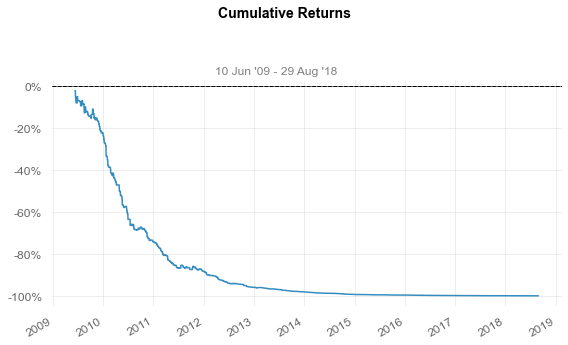

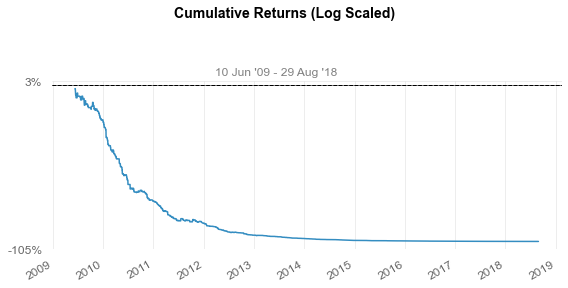

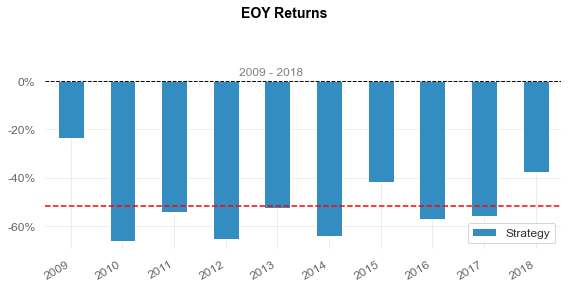

c:\pythonvenviroments\trade_ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


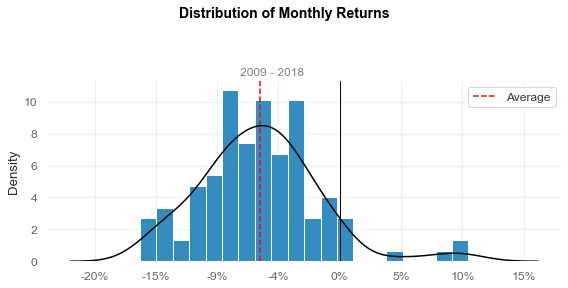

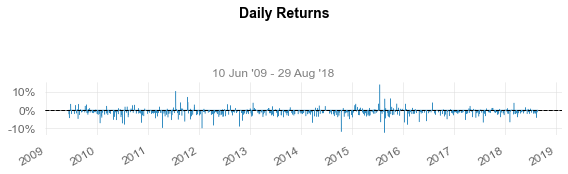

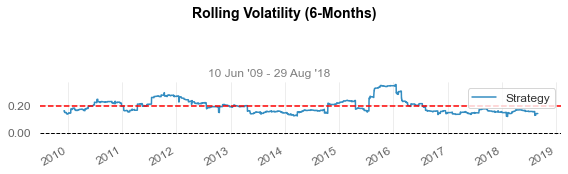

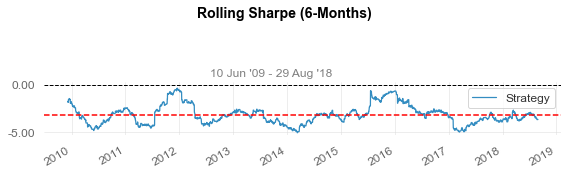

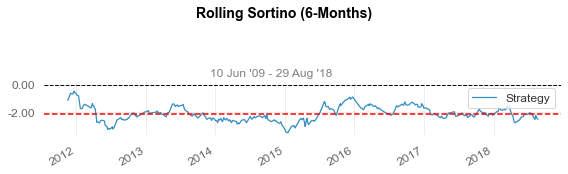

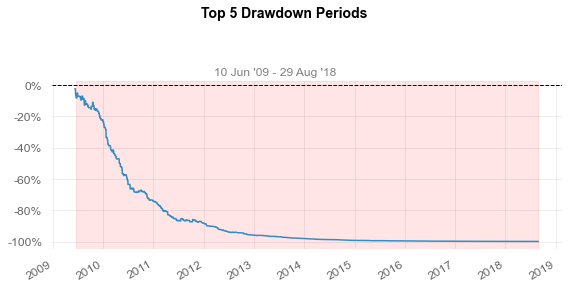

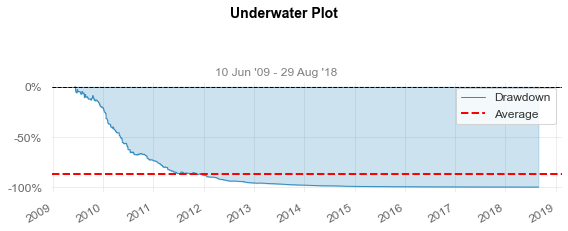

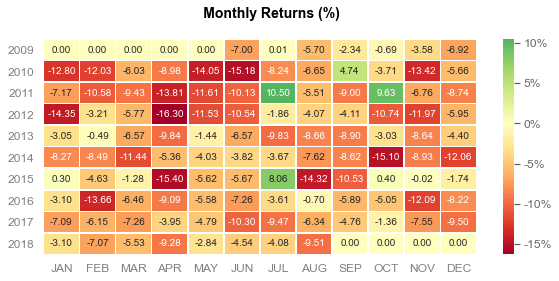

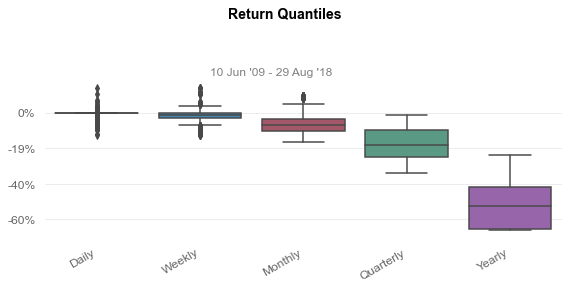

c:\pythonvenviroments\trade_ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [70]:
%matplotlib inline
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

### CNN Bi-LSTM

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
print(f'is GPU available for TF: {tf.test.is_gpu_available()}\n')

gpu_devices = tf.config.list_physical_devices('GPU')
print(f'GPU devices: {gpu_devices}\n')

all_devices = tf.config.list_physical_devices()
print(f'all devices: {all_devices}')

if len(gpu_devices) > 0:
    for device in gpu_devices: 
        tf.config.experimental.set_memory_growth(device, True)

def convert_to_tensor(data):
    tensor = tf.convert_to_tensor(data, dtype=tf.float32)
    return tensor

is GPU available for TF: True

GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

all devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]


#### get data and preprocess

In [53]:
tick_data_filepath = gi.download_mt5_data("EURUSD", 'H1', '2012-01-01', '2020-12-18')
data_with_indicators = gi.add_indicators_to_raw(filepath=tick_data_filepath, 
                                                save_to_disk=True, 
                                                config=config, 
                                                has_headers=True,
                                                datetime_col='datetime')
data_with_ichi_sigs = add_features(data_with_indicators)

dard = lambda df: dummy_and_remove_data(df, catagorical_cols=['quarter','day_of_week'], 
                                        categories = [[1,2,3,4], [0,1,2,3,4]],
                                        cols_to_remove=['datetime','spread','momentum_rsi', 'month', 'day', 'minute', 'hour', 'year',
                                                        'ticks_since_cloud_breakout_bull',
       'ticks_since_cloud_breakout_bear', 'tk_cross_most_recent_bull_strength',
       'tk_cross_most_recent_bear_strength', 'tk_cross_ticks_since_bull',
       'tk_cross_ticks_since_bear', 'tk_cross_most_recent_bull_length',
       'tk_cross_most_recent_bear_length', 'tk_cross_bull_length',
       'tk_cross_bear_length', 'tk_price_cross_most_recent_bull_strength',
       'tk_price_cross_most_recent_bear_strength',
       'tk_price_cross_ticks_since_bull', 'tk_price_cross_ticks_since_bear',
       'tk_price_cross_most_recent_bull_length',
       'tk_price_cross_most_recent_bear_length', 'tk_price_cross_bull_length',
       'tk_price_cross_bear_length', 'senkou_cross_most_recent_bull_strength',
       'senkou_cross_most_recent_bear_strength', 'senkou_cross_ticks_since_bull',
       'senkou_cross_ticks_since_bear', 'senkou_cross_most_recent_bull_length',
       'senkou_cross_most_recent_bear_length', 'senkou_cross_bull_length',
       'senkou_cross_bear_length', 'chikou_cross_most_recent_bull_strength',
       'chikou_cross_most_recent_bear_strength', 'chikou_cross_ticks_since_bull',
       'chikou_cross_ticks_since_bear', 'chikou_cross_most_recent_bull_length',
       'chikou_cross_most_recent_bear_length', 'chikou_cross_bull_length',
       'chikou_cross_bear_length','trend_ichimoku_a','trend_ichimoku_b'])#cols_to_remove=['momentum_rsi','datetime','month','day','minute','hour','year','spread'])

def missing_labels_preprocess(x_df, y_df, y_col):
    x_df = dard(x_df)
    if y_df:
        res = disregard_rows_with_missing_data(x_df, pd.DataFrame(y_df[y_col]))
    else:
        res = disregard_rows_with_missing_data(x_df, None)
    x, y = res[0]
    return x, y

all_data = missing_labels_preprocess(data_with_ichi_sigs,None,None)[0]
all_data_orig = all_data

# apply moving average to data
all_data = apply_moving_avg(all_data, cols=['Open','High','Low','Close','Volume'], window=21)
all_data.dropna(how='any', axis=0, inplace=True) # drop any NA rows due to applying moving average

# apply percentage change to data
all_data = apply_perc_change(all_data, cols=['Open','High','Low','Close','Volume',
                                             'trend_ichimoku_base','trend_ichimoku_conv',
                                             'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b',
                                             'chikou_span'])
all_data.dropna(how='any', axis=0, inplace=True) # drop any NA rows due to applying percentage change

all_data_orig = apply_perc_change(all_data_orig, cols=['Open','High','Low','Close','Volume',
                                             'trend_ichimoku_base','trend_ichimoku_conv',
                                             'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b',
                                             'chikou_span'])
all_data_orig.dropna(how='any', axis=0, inplace=True) # drop any NA rows due to applying percentage change

all_data.head()

loaded 55563 rows of tick data from C:\GitHub Repos\ForexMachine\Data\.cache\mt5_EURUSD_h1_ticks_2012-01-01T00;00UTC_to_2020-12-18T00;00UTC.csv
saved 55563 rows of EURUSD h1 tick data to C:\GitHub Repos\ForexMachine\Data\RawData\mt5_EURUSD_h1_ticks_2012-01-01T00;00UTC_to_2020-12-18T00;00UTC.csv, done.


Open      High       Low     Close    Volume  trend_ichimoku_conv  \
21 -0.000061 -0.000097 -0.000100 -0.000116  0.005845             0.000000   
22 -0.000117 -0.000113 -0.000138 -0.000106  0.019217             0.000563   
23 -0.000105 -0.000070 -0.000085 -0.000063  0.003618             0.000870   
24 -0.000063 -0.000123 -0.000098 -0.000146 -0.021296             0.000000   
25 -0.000145 -0.000141 -0.000109 -0.000134 -0.028722             0.000094   

    trend_ichimoku_base  trend_visual_ichimoku_a  trend_visual_ichimoku_b  \
21                  0.0                -0.000313                      0.0   
22                  0.0                -0.000289                      0.0   
23                  0.0                -0.000346                      0.0   
24                  0.0                -0.000501                      0.0   
25                  0.0                 0.000000                      0.0   

    chikou_span  ...  senkou_cross_bear_strength  chikou_cross_bull_strength  \
21     0.000336  ...                         0.0                         0.0   
22    -0.000164  ...                         0.0                         0.0   
23     0.000835  ...                         0.0                         0.0   
24     0.000803  ...                         0.0                         0.0   
25     0.001565  ...                         0.0                         0.0   

    chikou_cross_bear_strength  quarter_2  quarter_3  quarter_4  \
21                         0.0        0.0        0.0        0.0   
22                         0.0        0.0        0.0        0.0   
23                         0.0        0.0        0.0        0.0   
24                         0.0        0.0        0.0        0.0   
25                         0.0        0.0        0.0        0.0   

    day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  
21            0.0            0.0            1.0            0.0  
22            0.0            0.0            1.0            0.0  
23            0.0            0.0            1.0            0.0  
24            0.0            0.0            1.0            0.0  
25            0.0            0.0            1.0            0.0  

[5 rows x 31 columns]

#### hyperparameters

In [54]:
seq_len = 128
num_epochs = 400

In [55]:
# split data
len_data = all_data.shape[0]
train_perc = 0.8
train_len, val_len = int(len_data*train_perc), int(len_data*(1-train_perc)/2)

train_data_df = all_data.iloc[:train_len]
val_data_df = all_data.iloc[train_len:train_len+val_len]
test_data_df = all_data.iloc[train_len+val_len:] 

train_data_df_orig = all_data_orig.iloc[:train_data_df.index[-1]+1]
val_data_df_orig = all_data_orig.iloc[train_data_df.index[-1]+1:val_data_df.index[-1]+1]
test_data_df_orig = all_data_orig.iloc[val_data_df.index[-1]+1:] 

# normalize it
normalization_groups = [['Open','High','Low','Close'],  # prices
                        ['trend_ichimoku_base','trend_ichimoku_conv'],  # ichi conv & base lines
                        ['trend_visual_ichimoku_a', 'trend_visual_ichimoku_b'], # ichi cloud lines
                        ['tk_cross_bull_strength','tk_cross_bear_strength',   # tk cross strength
                        'tk_price_cross_bull_strength','tk_price_cross_bear_strength',   # tk price cross strength
                        'senkou_cross_bull_strength','senkou_cross_bear_strength',   # semkou cross strength
                        'chikou_cross_bull_strength','chikou_cross_bear_strength']]   # chikou cross strength

train_data_df, normalization_terms = normalize_data(train_data_df, groups=normalization_groups)   
val_data_df, normalization_terms = normalize_data(val_data_df, groups=normalization_groups, train_data=False, normalization_terms=normalization_terms)
test_data_df = normalize_data(test_data_df, groups=normalization_groups, train_data=False, normalization_terms=normalization_terms)[0]

train_data_df_orig, normalization_terms_2 = normalize_data(train_data_df_orig, groups=normalization_groups)   
val_data_df_orig, normalization_terms_2 = normalize_data(val_data_df_orig, groups=normalization_groups, train_data=False, normalization_terms=normalization_terms_2)
test_data_df_orig = normalize_data(test_data_df_orig, groups=normalization_groups, train_data=False, normalization_terms=normalization_terms_2)[0]

train_data = train_data_df.values
val_data = val_data_df.values
test_data = test_data_df.values

train_data_orig = train_data_df_orig.values
val_data_orig = val_data_df_orig.values
test_data_orig = test_data_df_orig.values

col_to_idx = {col_name: train_data_df.columns.get_loc(col_name) for col_name in train_data_df.columns}

batch_size = 1000
while len(train_data) % batch_size != 0:
    batch_size += 1
print(f'batch size = {batch_size}')

# training data
x_train, y_train = [], []
for i in range(seq_len, len(train_data)):
    x_train.append(train_data[i-seq_len:i])
    y_train.append(train_data[i][col_to_idx['Close']])
x_train, y_train = np.array(x_train), np.array(y_train)

# validation data
x_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    x_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[i][col_to_idx['Close']])
x_val, y_val = np.array(x_val), np.array(y_val)

# test data
x_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    x_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[i][col_to_idx['Close']])
x_test, y_test = np.array(x_test), np.array(y_test)

print(f'training data shape: x={x_train.shape}, y={y_train.shape}')
print(f'validation data shape: x={x_val.shape}, y={y_val.shape}')
print(f'test data shape: x={x_test.shape}, y={y_test.shape}')

batch size = 1265
training data shape: x=(44147, 128, 31), y=(44147,)
validation data shape: x=(5406, 128, 31), y=(5406,)
test data shape: x=(5407, 128, 31), y=(5407,)


In [48]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), train_data_df['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), val_data_df['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), test_data_df['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), train_data_df['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), val_data_df['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), test_data_df['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')

plt.legend(loc='best')

#### define model

In [56]:
def Inception_A(layer_in, c7):
    branch1x1_1 = layers.Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
    branch1x1 = layers.BatchNormalization()(branch1x1_1)
    branch1x1 = layers.ReLU()(branch1x1)

    branch5x5_1 = layers.Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
    branch5x5 = layers.BatchNormalization()(branch5x5_1)
    branch5x5 = layers.ReLU()(branch5x5)
    branch5x5 = layers.Conv1D(c7, kernel_size=5, padding='same', use_bias=False)(branch5x5)
    branch5x5 = layers.BatchNormalization()(branch5x5)
    branch5x5 = layers.ReLU()(branch5x5)  

    branch3x3_1 = layers.Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(layer_in)
    branch3x3 = layers.BatchNormalization()(branch3x3_1)
    branch3x3 = layers.ReLU()(branch3x3)
    branch3x3 = layers.Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
    branch3x3 = layers.BatchNormalization()(branch3x3)
    branch3x3 = layers.ReLU()(branch3x3)
    branch3x3 = layers.Conv1D(c7, kernel_size=3, padding='same', use_bias=False)(branch3x3)
    branch3x3 = layers.BatchNormalization()(branch3x3)
    branch3x3 = layers.ReLU()(branch3x3) 

    branch_pool = layers.AveragePooling1D(pool_size=(3), strides=1, padding='same')(layer_in)
    branch_pool = layers.Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
    branch_pool = layers.BatchNormalization()(branch_pool)
    branch_pool = layers.ReLU()(branch_pool)
    outputs = layers.Concatenate(axis=-1)([branch1x1, branch5x5, branch3x3, branch_pool])
    return outputs


def Inception_B(layer_in, c7):
    branch3x3 = layers.Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(layer_in)
    branch3x3 = layers.BatchNormalization()(branch3x3)
    branch3x3 = layers.ReLU()(branch3x3)  

    branch3x3dbl = layers.Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
    branch3x3dbl = layers.BatchNormalization()(branch3x3dbl)
    branch3x3dbl = layers.ReLU()(branch3x3dbl)  
    branch3x3dbl = layers.Conv1D(c7, kernel_size=3, padding="same", use_bias=False)(branch3x3dbl)  
    branch3x3dbl = layers.BatchNormalization()(branch3x3dbl)
    branch3x3dbl = layers.ReLU()(branch3x3dbl)  
    branch3x3dbl = layers.Conv1D(c7, kernel_size=3, padding="same", strides=2, use_bias=False)(branch3x3dbl)    
    branch3x3dbl = layers.BatchNormalization()(branch3x3dbl)
    branch3x3dbl = layers.ReLU()(branch3x3dbl)   

    branch_pool = layers.MaxPooling1D(pool_size=3, strides=2, padding="same")(layer_in)

    outputs = layers.Concatenate(axis=-1)([branch3x3, branch3x3dbl, branch_pool])
    return outputs


def Inception_C(layer_in, c7):
    branch1x1_1 = layers.Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
    branch1x1 = layers.BatchNormalization()(branch1x1_1)
    branch1x1 = layers.ReLU()(branch1x1)   

    branch7x7_1 = layers.Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)
    branch7x7 = layers.BatchNormalization()(branch7x7_1)
    branch7x7 = layers.ReLU()(branch7x7)   
    branch7x7 = layers.Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7)
    branch7x7 = layers.BatchNormalization()(branch7x7)
    branch7x7 = layers.ReLU()(branch7x7)  
    branch7x7 = layers.Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7)  
    branch7x7 = layers.BatchNormalization()(branch7x7)
    branch7x7 = layers.ReLU()(branch7x7)   

    branch7x7dbl_1 = layers.Conv1D(c7, kernel_size=1, padding="same", use_bias=False)(layer_in)  
    branch7x7dbl = layers.BatchNormalization()(branch7x7dbl_1)
    branch7x7dbl = layers.ReLU()(branch7x7dbl)  
    branch7x7dbl = layers.Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
    branch7x7dbl = layers.BatchNormalization()(branch7x7dbl)
    branch7x7dbl = layers.ReLU()(branch7x7dbl) 
    branch7x7dbl = layers.Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
    branch7x7dbl = layers.BatchNormalization()(branch7x7dbl)
    branch7x7dbl = layers.ReLU()(branch7x7dbl)  
    branch7x7dbl = layers.Conv1D(c7, kernel_size=(7), padding="same", use_bias=False)(branch7x7dbl)  
    branch7x7dbl = layers.BatchNormalization()(branch7x7dbl)
    branch7x7dbl = layers.ReLU()(branch7x7dbl)  
    branch7x7dbl = layers.Conv1D(c7, kernel_size=(1), padding="same", use_bias=False)(branch7x7dbl)  
    branch7x7dbl = layers.BatchNormalization()(branch7x7dbl)
    branch7x7dbl = layers.ReLU()(branch7x7dbl)  

    branch_pool = layers.AveragePooling1D(pool_size=3, strides=1, padding='same')(layer_in)
    branch_pool = layers.Conv1D(c7, kernel_size=1, padding='same', use_bias=False)(branch_pool)
    branch_pool = layers.BatchNormalization()(branch_pool)
    branch_pool = layers.ReLU()(branch_pool)  

    outputs = layers.Concatenate(axis=-1)([branch1x1, branch7x7, branch7x7dbl, branch_pool])
    return outputs


def create_model(seq_len, num_features):
    in_seq = layers.Input(shape=(seq_len, num_features))

    x = Inception_A(in_seq, 32)
    x = Inception_A(x, 32)
    x = Inception_B(x, 32)
    x = Inception_B(x, 32)
    x = Inception_C(x, 32)
    x = Inception_C(x, 32)    

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) 

    avg_pool = layers.GlobalAveragePooling1D()(x)
    max_pool = layers.GlobalMaxPooling1D()(x)
    conc = layers.concatenate([avg_pool, max_pool])
    conc = layers.Dense(64, activation="relu")(conc)
    out = layers.Dense(1, activation="sigmoid")(conc)      

    model = keras.Model(inputs=in_seq, outputs=out)
    model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])     
    return model

# def create_model(seq_len, num_features):
#     in_seq = layers.Input(shape = (seq_len, num_features))

#     x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(in_seq)
#     x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
#     x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) 

#     avg_pool = layers.GlobalAveragePooling1D()(x)
#     max_pool = layers.GlobalMaxPooling1D()(x)
#     conc = layers.concatenate([avg_pool, max_pool])
#     conc = layers.Dense(64, activation="relu")(conc)
#     out = layers.Dense(1, activation="linear")(conc)      

#     model = keras.Model(inputs=in_seq, outputs=out)
#     model.compile(loss="mse", optimizer="adam", metrics=['mae', 'mape'])    
#     return model

model = create_model(seq_len=x_train.shape[1], num_features=x_train.shape[2])
# print(model.summary())

In [57]:
callback = tf.keras.callbacks.ModelCheckpoint('../my_stuff/Bi-LSTM.hdf5', monitor='val_loss', save_best_only=True, verbose=1)

start_t = time.time()

model.fit(convert_to_tensor(x_train), convert_to_tensor(y_train),
          batch_size=batch_size,
          callbacks=[callback],
          epochs=num_epochs,
          #shuffle=True,
          validation_data=(convert_to_tensor(x_val), convert_to_tensor(y_val)))

print(f'training time = {(time.time()-start_t)/60} min')

Epoch 1/400
35/35 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0480 - mape: 10.7661
Epoch 00001: val_loss improved from inf to 0.00253, saving model to .\Bi-LSTM.hdf5
35/35 [==============================] - 15s 431ms/step - loss: 0.0042 - mae: 0.0480 - mape: 10.7661 - val_loss: 0.0025 - val_mae: 0.0425 - val_mape: 9.4352
Epoch 2/400
35/35 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0286 - mape: 6.4162
Epoch 00002: val_loss did not improve from 0.00253
35/35 [==============================] - 10s 294ms/step - loss: 0.0015 - mae: 0.0286 - mape: 6.4162 - val_loss: 0.0150 - val_mae: 0.1183 - val_mape: 25.7235
Epoch 3/400
35/35 [==============================] - ETA: 0s - loss: 7.7519e-04 - mae: 0.0205 - mape: 4.5336
Epoch 00003: val_loss did not improve from 0.00253
35/35 [==============================] - 11s 302ms/step - loss: 7.7519e-04 - mae: 0.0205 - mape: 4.5336 - val_loss: 0.0328 - val_mae: 0.1788 - val_mape: 38.5829
Epoch 4/400
35/35 [=

In [ ]:
model = tf.keras.models.load_model('../my_stuff/Bi-LSTM_mov_avg_5.hdf5')

print('done loading model')

#Calculate predication for training, validation and test data
train_pred = model.predict(convert_to_tensor(x_train))
val_pred = model.predict(convert_to_tensor(x_val))
test_pred = model.predict(convert_to_tensor(x_test))

#Print evaluation metrics for all datasets
train_eval = model.evaluate(convert_to_tensor(x_train), convert_to_tensor(y_train), verbose=0)
val_eval = model.evaluate(convert_to_tensor(x_val), convert_to_tensor(y_val), verbose=0)
test_eval = model.evaluate(convert_to_tensor(x_test), convert_to_tensor(y_test), verbose=0)

print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval[0], train_eval[1], train_eval[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval[0], val_eval[1], val_eval[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval[0], test_eval[1], test_eval[2]))

done loading model


In [ ]:
model_2 = tf.keras.models.load_model('../my_stuff/Bi-LSTM_mov_avg_13.hdf5')

print('done loading model')

#Calculate predication for training, validation and test data
train_pred_2 = model_2.predict(convert_to_tensor(x_train))
val_pred_2 = model_2.predict(convert_to_tensor(x_val))
test_pred_2 = model_2.predict(convert_to_tensor(x_test))

#Print evaluation metrics for all datasets
train_eval_2 = model_2.evaluate(convert_to_tensor(x_train), convert_to_tensor(y_train), verbose=0)
val_eval_2 = model_2.evaluate(convert_to_tensor(x_val), convert_to_tensor(y_val), verbose=0)
test_eval_2 = model_2.evaluate(convert_to_tensor(x_test), convert_to_tensor(y_test), verbose=0)

print('Evaluation metrics')
print('Training Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(train_eval_2[0], train_eval_2[1], train_eval_2[2]))
print('Validation Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(val_eval_2[0], val_eval_2[1], val_eval_2[2]))
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval_2[0], test_eval_2[1], test_eval_2[2]))

In [51]:
fig = plt.figure(figsize=(15,15))
st = fig.suptitle("CNN + Bi-LSTM Model", fontsize=22)
st.set_y(1.02)

# #Plot training data results
# ax11 = fig.add_subplot(311)
# ax11.plot(train_data[seq_len:, 3], label='EURUSD Closing Returns')
# ax11.plot(train_pred, color='yellow', linewidth=3, label='Predicted EURUSD Closing Returns')
# ax11.set_title("Training Data", fontsize=18)
# ax11.set_xlabel('Date')
# ax11.set_ylabel('EURUSD Closing Returns')

# #Plot validation data results
# ax21 = fig.add_subplot(312)
# ax21.plot(val_data[seq_len:, 3], label='EURUSD Closing Returns')
# ax21.plot(val_pred, color='yellow', linewidth=3, label='Predicted EURUSD Closing Returns')
# ax21.set_title("Validation Data", fontsize=18)
# ax21.set_xlabel('Date')
# ax21.set_ylabel('EURUSD Closing Returns')

#Plot test data results
ax31 = fig.add_subplot(111)
ax31.plot(test_data[seq_len:, 3], label='EURUSD Closing Returns')
ax31.plot(test_pred, color='yellow', linewidth=3, label='Predicted EURUSD Closing Returns')
ax31.plot(test_data_orig[:, 3], label='Original EURUSD Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('EURUSD Closing Returns')

plt.style.use('seaborn')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### evaluate models w/ backtrader

### notes on things to do

In [1026]:
"""
if self.data[i][self.feature_indices['datetime']].strftime('%Y-%m-%dT%H:%M') == '2013-05-28T10:00':
    print('yo')
"""

"""
Notes:

- Function Idea:  When computing the output for a given test input, in other words when deciding if it was best
                to buy or sell at this point, create a function that takes a "max_loss" kinda arg, so if you
                lose more than max_loss...
                
- As a starting point for training data, only consider points from data_with_indicators when the price breaks out 
  below or above the cloud due to this strat: https://www.tradeciety.com/the-complete-ichimoku-trading-guide-how-to-use-the-ichimoku-indicator/

- When actually training, make sure to try out several combinations of different features for freatuer selection. For
  example, see if the "most_recently_" and "ticks_since_" type features for crosses work better than the respective 
  feature that will be non-zero only on the exact tick that a cross happens
"""

"""
To-do:

1) create model for closing trades
    - try an RL model or LSTM
2) evaluate model with backtrader to see profit performance
3) try an LSTM model
4) try an RL model
"""

'\nTo-do:\n\n1) modify generate_ichimoku_labels to also generate labels for closing trades\n3) try an LSTM model\n4) try an RL model\n'